In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
print(train_df.shape, test_df.shape)


(1168, 81) (292, 80)


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [3]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [4]:
rows_with_poolqc = train_df[train_df['PoolQC'].notna()]
poolqc_and_price = rows_with_poolqc[['PoolArea', 'PoolQC', 'SalePrice']]
print(poolqc_and_price)

     PoolArea PoolQC  SalePrice
64        480     Gd     160000
107       512     Ex     235000
174       738     Gd     274970
647       555     Ex     745000
670       648     Fa     181000
777       519     Fa     250000


In [5]:
rows_with_misc = train_df[train_df['MiscFeature'].notna()]
misc_and_price = rows_with_misc[['MiscFeature', 'SalePrice']]
print(misc_and_price)

     MiscFeature  SalePrice
4           Shed     122900
12          Shed     168500
35          Shed      76500
65          Shed     116050
84          Shed     266500
100         Shed     130000
102         Shed     128950
106         Shed     148000
151         Shed     148000
170         Shed      83000
182         Shed     170000
215         Gar2     151500
242         Shed     160000
270         Shed     277000
274         Shed      81000
282         Shed     161750
286         Othr      55000
326         Shed      79500
389         Shed     228950
399         Shed     256000
426         Shed     143000
433         Shed     131400
445         Shed     140000
482         Shed      88000
510         Shed     163000
520         Shed      55993
524         Othr     133000
528         Shed     144000
584         Shed     129000
596         Shed      90000
598         Shed     185000
600         Shed     106500
624         Shed     202500
657         Shed     157900
668         Shed    

In [6]:
rows_with_Alley = train_df[train_df['Alley'].notna()]
Alley_and_price = rows_with_Alley[['Alley', 'SalePrice']]
print(Alley_and_price)

     Alley  SalePrice
18    Pave     214500
61    Pave     163000
75    Grvl     115000
78    Pave     171900
92    Grvl      73000
...    ...        ...
1070  Pave     197000
1074  Pave     122000
1091  Pave     176000
1103  Grvl     136000
1143  Grvl     157500

[70 rows x 2 columns]


In [7]:
house_df = train_df.copy()

In [8]:
house_df.drop(['Id','PoolQC' , 'PoolArea', 'MiscFeature', 'Alley'], axis=1 , inplace=True)

In [9]:
# MSSubClass를 문자열로 변환하여 OHE 적용 준비
house_df['MSSubClass'] = house_df['MSSubClass'].astype(str)

# MSSubClass와 MSZoning에 OHE 적용
house_df = pd.get_dummies(house_df, columns=['MSSubClass', 'MSZoning'], drop_first=True)

In [10]:
# 결측치를 Neighborhood의 중앙값으로 대체
house_df['LotFrontage'] = house_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 로그 1p 변환 적용
house_df['LotFrontage_Log'] = np.log1p(house_df['LotFrontage'])

# 원본 칼럼 삭제
house_df = house_df.drop('LotFrontage', axis=1, errors='ignore')

In [11]:
# 로그 1p 변환 적용
house_df['LotArea_Log'] = np.log1p(house_df['LotArea'])

# 원본 칼럼 삭제
house_df = house_df.drop('LotArea', axis=1, errors='ignore')

In [12]:
# Pave에 1, Grvl에 0을 부여하는 이진 인코딩 적용
street_map = {'Pave': 1, 'Grvl': 0}
house_df['Street_Enc'] = house_df['Street'].map(street_map).fillna(1) # NaN은 Pave로 가정하여 1

# 원본 칼럼 삭제
house_df = house_df.drop('Street', axis=1, errors='ignore')

In [13]:
# --- 1. 순서형 인코딩 적용 (LotShape, LandSlope) ---

# LotShape 1~4점 척도
lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 4}
house_df['LotShape_Enc'] = house_df['LotShape'].map(lot_shape_map).fillna(4)

# LandSlope 1~3점 척도
land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 3}
house_df['LandSlope_Enc'] = house_df['LandSlope'].map(land_slope_map).fillna(3)


# --- 2. 명목형 특성 원-핫 인코딩 적용 (LandContour, LotConfig) ---
house_df['LandContour'] = house_df['LandContour'].fillna('Unknown')
house_df['LotConfig'] = house_df['LotConfig'].fillna('Unknown')

house_df = pd.get_dummies(house_df, columns=['LandContour', 'LotConfig'], drop_first=True)


# --- 3. 희소 특성 Utilities 처리 (삭제 또는 이진 변수화) ---
# AllPub이 아닌 특성이 매우 희소하다고 가정하고, 이진 특성으로 변환
# AllPub에 1, 나머지에 0을 부여
house_df['Is_AllPub'] = house_df['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)


# --- 4. 원본 칼럼 삭제 ---
columns_to_drop = [
    'LotShape',
    'LandSlope',
    'Utilities' # Is_AllPub으로 대체됨
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 토지 관련 특성 엔지니어링 완료.")

✅ 토지 관련 특성 엔지니어링 완료.


In [14]:
print(house_df['Condition1'].value_counts(dropna=False))

Condition1
Norm      1005
Feedr       63
Artery      37
RRAn        20
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


In [15]:
print(house_df['Condition2'].value_counts(dropna=False))

Condition2
Norm      1157
Feedr        3
PosN         2
Artery       2
PosA         1
RRAe         1
RRAn         1
RRNn         1
Name: count, dtype: int64


In [16]:
# 네 가지 명목형 특성에 대해 결측치 처리 후 OHE 적용

# 1. Neighborhood (주변 지역) - OHE 적용
house_df['Neighborhood'] = house_df['Neighborhood'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['Neighborhood'], prefix='Neighborhood', drop_first=True)

# 2. Condition1 (주요 근접도) - OHE 적용
house_df['Condition1'] = house_df['Condition1'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['Condition1'], prefix='Condition1', drop_first=True)

# 3. Condition2 (두 번째 근접도) - 삭제
# 극도로 희소하므로 특성으로 변환하지 않고 삭제합니다.
house_df = house_df.drop('Condition2', axis=1, errors='ignore')

# 4. BldgType (건물 유형) - OHE 적용
house_df['BldgType'] = house_df['BldgType'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['BldgType'], prefix='BldgType', drop_first=True)


print("✅ Neighborhood, Condition1, BldgType 원-핫 인코딩 완료 및 Condition2 삭제 완료.")
print("위치 및 건물 유형 관련 중요한 범주형 정보를 특성으로 변환했습니다.")

✅ Neighborhood, Condition1, BldgType 원-핫 인코딩 완료 및 Condition2 삭제 완료.
위치 및 건물 유형 관련 중요한 범주형 정보를 특성으로 변환했습니다.


In [17]:
# 1. OverallQual 로그 변환
house_df['OverallQual_Log'] = np.log1p(house_df['OverallQual'])

# 2. OverallCond 로그 변환
house_df['OverallCond_Log'] = np.log1p(house_df['OverallCond'])

# 3. 원본 칼럼 삭제
house_df = house_df.drop(['OverallQual', 'OverallCond'], axis=1, errors='ignore')

print("✅ OverallQual 및 OverallCond 로그 변환 완료.")
print(f"새로운 최종 특성: {['OverallQual_Log', 'OverallCond_Log']}")

✅ OverallQual 및 OverallCond 로그 변환 완료.
새로운 최종 특성: ['OverallQual_Log', 'OverallCond_Log']


In [18]:
rows_with_MasV = train_df[train_df['MasVnrType'].notna()]
MasV_and_price = rows_with_MasV[['MasVnrType', 'SalePrice']]
print(MasV_and_price)

     MasVnrType  SalePrice
0       BrkFace     135000
2       BrkFace     176000
3       BrkFace     318000
7         Stone     241000
9       BrkFace     284000
...         ...        ...
1160    BrkFace     106000
1161    BrkFace     260000
1162    BrkFace     149900
1165    BrkFace     272000
1166    BrkFace     274000

[474 rows x 2 columns]


In [19]:
print(house_df['MasVnrType'].value_counts(dropna=False))

MasVnrType
NaN        694
BrkFace    359
Stone      104
BrkCmn      11
Name: count, dtype: int64


In [20]:
# 1. 문자열 범주에 대한 매핑 딕셔너리 정의 (NaN=0을 제외한 점수)
string_to_score_map = {
    'Stone': 2,
    'BrkFace': 1,
    'BrkCmn': 1,
}

# 2. NaN 값을 먼저 0으로 채우기
# 이 시점에서 NaN이었던 값들은 0이 됩니다.
house_df['MasVnrType_Encoded'] = house_df['MasVnrType'].fillna(0)

# 3. 나머지 문자열 값들을 정의된 딕셔너리에 따라 숫자로 대체 (replace 사용)
# 이미 0으로 채워진 값(이전의 NaN)은 변경되지 않습니다.
house_df['MasVnrType_Encoded'] = house_df['MasVnrType_Encoded'].replace(string_to_score_map)


# 4. 결과 확인
print("MasVnrType_Encoded 값별 개수:")
# 결과는 모두 수치형(float 또는 int)으로 나옵니다.
print(house_df['MasVnrType_Encoded'].value_counts())


MasVnrType_Encoded 값별 개수:
MasVnrType_Encoded
0    694
1    370
2    104
Name: count, dtype: int64


In [21]:
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)

In [22]:
# 1. MasVnrArea를 로그 변환 (Log 1p)
# 0 값을 포함하기 때문에 np.log1p 사용
house_df['MasVnrArea_Log'] = np.log1p(house_df['MasVnrArea'])

# 2. 로그 변환된 면적과 인코딩된 유형 점수를 곱하여 최종 점수 생성
house_df['MasVnrScore'] = house_df['MasVnrArea_Log'] * house_df['MasVnrType_Encoded']

# 결과 확인
print(house_df[['MasVnrArea', 'MasVnrArea_Log', 'MasVnrType_Encoded', 'MasVnrScore']].head(10))

   MasVnrArea  MasVnrArea_Log  MasVnrType_Encoded  MasVnrScore
0       151.0        5.023881                   1     5.023881
1         0.0        0.000000                   0     0.000000
2        72.0        4.290459                   1     4.290459
3       254.0        5.541264                   1     5.541264
4         0.0        0.000000                   0     0.000000
5         0.0        0.000000                   0     0.000000
6         0.0        0.000000                   0     0.000000
7       100.0        4.615121                   2     9.230241
8         0.0        0.000000                   0     0.000000
9       292.0        5.680173                   1     5.680173


In [23]:
columns_to_drop = [
    'MasVnrArea',
    'MasVnrArea_Log',
    'MasVnrType',
    'MasVnrType_Encoded'
]

house_df = house_df.drop(columns_to_drop, axis=1)

In [24]:
print(house_df['Exterior1st'].value_counts())

Exterior1st
VinylSd    403
HdBoard    188
Wd Sdng    173
MetalSd    167
Plywood     82
CemntBd     54
BrkFace     39
WdShing     22
Stucco      19
AsbShng     15
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
CBlock       1
Name: count, dtype: int64


In [25]:
print(house_df['Exterior2nd'].value_counts())

Exterior2nd
VinylSd    395
HdBoard    174
MetalSd    162
Wd Sdng    161
Plywood    108
CmentBd     52
Wd Shng     34
BrkFace     22
Stucco      22
AsbShng     16
ImStucc      9
Brk Cmn      5
AsphShn      3
Stone        3
CBlock       1
Other        1
Name: count, dtype: int64


In [26]:
print(house_df['ExterQual'].value_counts())

ExterQual
TA    715
Gd    398
Ex     44
Fa     11
Name: count, dtype: int64


In [27]:
print(house_df['ExterCond'].value_counts())

ExterCond
TA    1019
Gd     120
Fa      25
Ex       3
Po       1
Name: count, dtype: int64


In [28]:
# 1. 3점 척도로 재정의된 매핑 딕셔너리 정의
exterior_simple_map = {
    # Score 3: Premium/Brick/Durable
    'Stone': 3, 'CemntBd': 3, 'BrkFace': 3, 'BrkComm': 3,

    # Score 2: Mid-range Wood/Engineered
    'Plywood': 2, 'HdBoard': 2, 'Wd Sdng': 2, 'WdShing': 2,

    # Score 1: Common/Low Quality
    'VinylSd': 1, 'MetalSd': 1, 'Stucco': 1, 'ImStucc': 1,
    'AsbShng': 1, 'AsphShn': 1, 'CBlock': 1,

    # NaN은 최저점 1로 매핑
    np.nan: 1
}

# 1-2. ExterQual/ExterCond 5점 척도 매핑 (품질/상태)
qual_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 3}
# ExteQual/ExterCond는 NaN이 거의 없지만, 있다면 'TA'(평균)인 3점으로 처리합니다.

# --- 2. 면적 처리 ---
# 1층 면적과 2층 면적을 더하여 총 지상 면적(TotalLivingArea) 생성
house_df['TotalLivingArea'] = house_df['1stFlrSF'] + house_df['2ndFlrSF']
# 로그 1p 변환 적용
house_df['TotalLivingArea_Log'] = np.log1p(house_df['TotalLivingArea'])


# --- 3. 외장재 유형 점수 (ExteriorScore) 생성 ---
# 3-1. 1st, 2nd 모두 3점 척도로 인코딩 및 합산
house_df['Ext1_Enc'] = house_df['Exterior1st'].map(exterior_simple_map).fillna(1)
house_df['Ext2_Enc'] = house_df['Exterior2nd'].map(exterior_simple_map).fillna(1)
house_df['ExteriorQualityScore_Type'] = house_df['Ext1_Enc'] + house_df['Ext2_Enc']

# 3-2. ExteriorScore = 로그 면적 * 외장재 유형 합산 점수
house_df['ExteriorScore'] = house_df['TotalLivingArea_Log'] * house_df['ExteriorQualityScore_Type']


# --- 4. 최종 점수 가중치 부여 및 안정화 ---
# 4-1. ExterQual/ExterCond 인코딩 및 합산 (가중치)
house_df['ExterQual_Enc'] = house_df['ExterQual'].map(qual_cond_map).fillna(3)
house_df['ExterCond_Enc'] = house_df['ExterCond'].map(qual_cond_map).fillna(3)
house_df['ExterTotalQuality'] = house_df['ExterQual_Enc'] + house_df['ExterCond_Enc']

# 4-2. 최종 결합 점수 생성 (곱셈 가중치)
# FinalExtScore = ExteriorScore * (ExterQual + ExterCond)
house_df['FinalExtScore'] = house_df['ExteriorScore'] * house_df['ExterTotalQuality']

# 4-3. 최종 점수에 로그 1p 변환을 적용하여 안정화 (범위 압축)
house_df['FinalExtScore_Log'] = np.log1p(house_df['FinalExtScore'])


# --- 5. 불필요한 원본 및 임시 칼럼 제거 ---
columns_to_drop = [
    # 원본 면적 칼럼
    '1stFlrSF', '2ndFlrSF', 'TotalLivingArea', 'TotalLivingArea_Log',
    # 원본 외장재 유형 칼럼
    'Exterior1st', 'Exterior2nd',
    # 원본 외장재 품질/상태 칼럼
    'ExterQual', 'ExterCond',
    # 임시/중간 단계 칼럼
    'Ext1_Enc', 'Ext2_Enc', 'ExteriorQualityScore_Type',
    'ExterQual_Enc', 'ExterCond_Enc', 'ExterTotalQuality',
    'ExteriorScore', 'FinalExtScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

# 최종 결과 확인
print("\n✅ FinalExtScore_Log 생성 및 모든 관련 칼럼 정리 완료.")
print(f"새로 생성된 최종 특성: {'FinalExtScore_Log'}")
print(f"데이터프레임 크기: {house_df.shape}")


✅ FinalExtScore_Log 생성 및 모든 관련 칼럼 정리 완료.
새로 생성된 최종 특성: FinalExtScore_Log
데이터프레임 크기: (1168, 123)


In [29]:
print(house_df['Fireplaces'].value_counts())

Fireplaces
0    545
1    520
2     98
3      5
Name: count, dtype: int64


In [30]:
print(house_df['FireplaceQu'].value_counts())

FireplaceQu
Gd    314
TA    246
Fa     27
Ex     20
Po     16
Name: count, dtype: int64


In [31]:
# 1. FireplaceQu 0~3점 척도 순서형 매핑 정의
fireplace_simple_map = {
    'Ex': 3, 'Gd': 3,  # Ex, Gd를 3점으로 통합
    'TA': 2,           # TA를 2점으로 유지
    'Fa': 1, 'Po': 1,  # Fa, Po를 1점으로 통합
    np.nan: 0          # 벽난로가 없는 경우 (결측치)는 0점으로 처리
}

# 2. 품질 인코딩 적용
house_df['FireplaceQu_Enc'] = house_df['FireplaceQu'].map(fireplace_simple_map).fillna(0)

# 3. FireplaceScore 통합 (품질 * 개수)
# Fireplaces 칼럼은 이미 수치형입니다.
house_df['FireplaceScore'] = house_df['FireplaceQu_Enc'] * house_df['Fireplaces']

# 4. 로그 변환을 적용하여 안정화
house_df['FireplaceScore_Log'] = np.log1p(house_df['FireplaceScore'])

# 5. 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'Fireplaces',
    'FireplaceQu',
    'FireplaceQu_Enc',
    'FireplaceScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ Fireplaces/FireplaceQu 3점 척도 통합 및 로그 변환 완료.")
print(f"새로운 최종 특성: {'FireplaceScore_Log'}")

✅ Fireplaces/FireplaceQu 3점 척도 통합 및 로그 변환 완료.
새로운 최종 특성: FireplaceScore_Log


In [32]:
# 'Fence'의 값이 NaN이 아니면 (즉, 울타리 품질/유형이 명시되어 있으면) 1,
# NaN이면 (울타리가 없으면) 0으로 설정하여 'HasFence' 칼럼 생성
house_df['HasFence'] = house_df['Fence'].notna().astype(int)

# 널 값을 처리했으므로 원본 Fence 칼럼은 제거
house_df = house_df.drop('Fence', axis=1)

print("\nHasFence 값별 개수:")
print(house_df['HasFence'].value_counts())


HasFence 값별 개수:
HasFence
0    941
1    227
Name: count, dtype: int64


In [33]:
print(house_df['BsmtQual'].value_counts(dropna=False))

BsmtQual
TA     523
Gd     501
Ex      91
Fa      30
NaN     23
Name: count, dtype: int64


In [34]:
print(house_df['BsmtExposure'].value_counts(dropna=False))

BsmtExposure
No     773
Av     179
Gd     102
Mn      90
NaN     24
Name: count, dtype: int64


In [35]:
print(house_df['BsmtFinType1'].value_counts(dropna=False))

BsmtFinType1
Unf    353
GLQ    339
ALQ    174
BLQ    121
Rec    104
LwQ     54
NaN     23
Name: count, dtype: int64


In [36]:
print(house_df['BsmtFinSF1'].value_counts(dropna=False))

BsmtFinSF1
0       376
24        9
16        8
662       5
428       4
       ... 
859       1
1904      1
837       1
572       1
1270      1
Name: count, Length: 555, dtype: int64


In [37]:
print(house_df['BsmtFinType2'].value_counts(dropna=False))

BsmtFinType2
Unf    1018
Rec      40
LwQ      37
BLQ      24
NaN      24
ALQ      15
GLQ      10
Name: count, dtype: int64


In [38]:
print(house_df['BsmtFinSF2'].value_counts(dropna=False))

BsmtFinSF2
0       1041
180        5
374        3
551        2
290        2
        ... 
627        1
106        1
1085       1
1474       1
713        1
Name: count, Length: 112, dtype: int64


In [39]:
print(house_df['BsmtUnfSF'].value_counts(dropna=False))

BsmtUnfSF
0      89
728     9
572     7
300     7
384     7
       ..
398     1
519     1
588     1
179     1
372     1
Name: count, Length: 688, dtype: int64


In [40]:
print(house_df['TotalBsmtSF'].value_counts(dropna=False))

TotalBsmtSF
864     25
0       23
672     15
912     13
1040    12
        ..
1175     1
908      1
1007     1
1247     1
1814     1
Name: count, Length: 634, dtype: int64


In [41]:
house_df['TotalBsmtSF_Log'] = np.log1p(house_df['TotalBsmtSF'])

In [42]:
# BsmtCond (상태) 매핑
cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Bsmt': 0}
house_df['BsmtCond_Enc'] = house_df['BsmtCond'].fillna('No Bsmt').map(cond_map)

# BsmtExposure (노출) 매핑
exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Bsmt': 0}
house_df['BsmtExposure_Enc'] = house_df['BsmtExposure'].fillna('No Bsmt').map(exposure_map)

# 품질/상태 총합 점수 생성
house_df['BsmtStateScore'] = house_df['BsmtCond_Enc'] + house_df['BsmtExposure_Enc']

In [43]:
# 최종 BsmtScore = 로그 면적 * 상태 점수
house_df['BsmtScore'] = house_df['TotalBsmtSF_Log'] * house_df['BsmtStateScore']

# 제거할 칼럼 목록 정의 및 삭제
columns_to_drop = [
    # 원본 면적 칼럼 제거
    'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    # 원본 품질/유형 칼럼 제거
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    # 임시 인코딩 칼럼 제거
    'TotalBsmtSF_Log', 'BsmtCond_Enc', 'BsmtExposure_Enc', 'BsmtStateScore'
]

# 데이터프레임에서 칼럼 삭제
house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [44]:
# house_df에서 작업 진행

# 1. HouseAge (주택 연령) 계산
# YrSold (판매 연도) 칼럼을 사용한다고 가정
house_df['HouseAge'] = house_df['YrSold'] - house_df['YearBuilt']

# 2. YearsSinceRemodel (리모델링 후 경과 연수) 계산
house_df['YearsSinceRemodel'] = house_df['YrSold'] - house_df['YearRemodAdd']

# 3. HasRemodeled (리모델링 유무) 이진 변수 생성
house_df['HasRemodeled'] = (house_df['YearBuilt'] != house_df['YearRemodAdd']).astype(int)

# 4. 원본 '연도' 칼럼 제거 및 정리
columns_to_drop = [
    'YearBuilt',
    'YearRemodAdd'
    # 'YrSold'도 주택 연령 계산에 사용했으므로 필요하지 않다면 제거 가능
    # 'YrSold'는 계절성(시간의 흐름)을 위해 남겨두는 경우도 있음. 여기서는 남겨둡니다.
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

# 결과 확인
print("주택 연령 관련 특성 생성 및 정리 완료.")
print(house_df[['HouseAge', 'YearsSinceRemodel', 'HasRemodeled']].head())

주택 연령 관련 특성 생성 및 정리 완료.
   HouseAge  YearsSinceRemodel  HasRemodeled
0        53                 53             0
1        22                 21             1
2        19                 19             0
3         0                  0             0
4        58                  1             1


In [45]:
import pandas as pd

# 'Gable'과 'Hip'을 제외한 스타일을 희소 범주로 간주하여 'Other'로 통합
# 실제 데이터셋에서 희소 범주를 확인한 후 통합 기준을 정해야 하지만, 여기서는 일반적인 희소 범주를 통합합니다.
rare_roof_styles = ['Gambrel', 'Mansard', 'Shed', 'Flat']
house_df['RoofStyle_Simplified'] = house_df['RoofStyle'].replace(rare_roof_styles, 'Other')

# 원-핫 인코딩 적용
# drop_first=True로 다중공선성(Multicollinearity)을 방지합니다.
house_df = pd.get_dummies(house_df, columns=['RoofStyle_Simplified'], prefix='RoofStyle', drop_first=True)

# 지붕 재료의 가치/품질 순서를 반영한 매핑 딕셔너리 정의
roofmatl_map = {
    # 3점: 최고급 목재/내구성 재료
    'WdShngl': 3, 'WdShake': 3, 'Membran': 3,

    # 2점: 표준/복합 재료 (가장 일반적)
    'CompShg': 2, 'Tar&Grv': 2,

    # 1점: 저가 또는 매우 희소한 재료
    'Metal': 1, 'Roll': 1, 'ClyTile': 1,

    # NaN은 표준인 2점으로 처리 (결측치가 거의 없지만 대비)
    np.nan: 2
}

# 순서형 인코딩 적용
house_df['RoofMatl_Encoded'] = house_df['RoofMatl'].map(roofmatl_map).fillna(2)

# 원본 칼럼 제거
columns_to_drop = [
    'RoofStyle',
    'RoofMatl'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

# 최종 결과 확인
print("\n✅ RoofStyle 및 RoofMatl 특성 엔지니어링 완료.")
print(f"새로운 RoofStyle 원-핫 인코딩 칼럼들 (샘플): {house_df.filter(like='RoofStyle_').columns.tolist()}")
print(f"새로운 RoofMatl 인코딩 칼럼: {'RoofMatl_Encoded'}")
print(f"데이터프레임 크기: {house_df.shape}")


✅ RoofStyle 및 RoofMatl 특성 엔지니어링 완료.
새로운 RoofStyle 원-핫 인코딩 칼럼들 (샘플): ['RoofStyle_Hip', 'RoofStyle_Other']
새로운 RoofMatl 인코딩 칼럼: RoofMatl_Encoded
데이터프레임 크기: (1168, 116)


In [46]:
print(house_df['Foundation'].value_counts(dropna=False))

Foundation
PConc     522
CBlock    498
BrkTil    126
Slab       15
Stone       5
Wood        2
Name: count, dtype: int64


In [47]:
import numpy as np

# Foundation 3점 척도 매핑 정의
foundation_map = {
    'PConc': 3,
    'CBlock': 2, 'Slab': 1,
    'BrkTil': 1, 'Stone': 1, 'Wood': 1
}

# 1. 순서형 인코딩 적용
# Foundation 칼럼에는 결측치(NaN)가 거의 없지만, 만약 있다면 가장 흔한 CBlock과 동일한 2점으로 처리합니다.
house_df['Foundation_Enc'] = house_df['Foundation'].map(foundation_map).fillna(2)

# 2. 원본 Foundation 칼럼 삭제
house_df = house_df.drop('Foundation', axis=1, errors='ignore')

# 결과 확인
print("✅ Foundation 순서형 인코딩 완료.")
print("Foundation_Enc 값별 개수:")
print(house_df['Foundation_Enc'].value_counts().sort_index())

✅ Foundation 순서형 인코딩 완료.
Foundation_Enc 값별 개수:
Foundation_Enc
1    148
2    498
3    522
Name: count, dtype: int64


In [48]:
print(house_df['Heating'].value_counts(dropna=False))

Heating
GasA    1147
GasW      11
Grav       6
Wall       2
OthW       2
Name: count, dtype: int64


In [49]:
print(house_df['HeatingQC'].value_counts(dropna=False))

HeatingQC
Ex    598
TA    343
Gd    190
Fa     36
Po      1
Name: count, dtype: int64


In [50]:
# --- 1. 난방 시스템 종류 (Heating) 1~2점 척도 매핑 정의 ---
# GasA에 2점, 나머지에 1점을 부여
heating_type_map = {
    'GasA': 2,
    'GasW': 1, 'Grav': 1, 'Wall': 1, 'OthW': 1, 'Floor': 1,
    np.nan: 1
}

# --- 2. 난방 품질 (HeatingQC) 3점 척도 매핑 정의 ---
# (Ex, Gd=3), (TA=2), (Fa, Po=1)로 그룹화
heatingqc_simple_map = {
    'Ex': 3, 'Gd': 2,
    'TA': 1,
    'Fa': 1, 'Po': 1,
    np.nan: 1
}

# --- 3. 인코딩 및 통합 점수 생성 ---
house_df['Heating_Enc'] = house_df['Heating'].map(heating_type_map).fillna(1)
house_df['HeatingQC_Enc'] = house_df['HeatingQC'].map(heatingqc_simple_map).fillna(1)

# HeatingScore = Heating 유형(1~2) * HeatingQC 품질(1~3) (최소 1, 최대 6)
house_df['HeatingScore'] = house_df['Heating_Enc'] * house_df['HeatingQC_Enc']

# --- 4. 로그 변환 및 정리 ---
house_df['HeatingScore_Log'] = np.log1p(house_df['HeatingScore'])

# 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'Heating',
    'HeatingQC',
    'Heating_Enc',
    'HeatingQC_Enc',
    'HeatingScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ Heating/HeatingQC 통합 및 로그 변환 완료.")
print(f"새로운 최종 특성: {'HeatingScore_Log'}")
print(house_df[['HeatingScore_Log']].head())

✅ Heating/HeatingQC 통합 및 로그 변환 완료.
새로운 최종 특성: HeatingScore_Log
   HeatingScore_Log
0          1.098612
1          1.098612
2          1.609438
3          1.945910
4          1.945910


In [51]:
print(house_df['CentralAir'].value_counts(dropna=False))

CentralAir
Y    1093
N      75
Name: count, dtype: int64


In [52]:
# 'Y' (Yes)는 1로, 'N' (No)는 0으로 변환하는 이진 인코딩 적용
central_air_map = {'Y': 1, 'N': 0}

# 1. 매핑 적용 후, .fillna(0)을 사용하여 결측치(NaN)를 0으로 처리
house_df['CentralAir_Enc'] = house_df['CentralAir'].map(central_air_map).fillna(0)

# 2. 원본 CentralAir 칼럼 삭제
house_df = house_df.drop('CentralAir', axis=1, errors='ignore')

print("✅ CentralAir 이진 인코딩 및 결측치 처리 완료.")
print(house_df['CentralAir_Enc'].value_counts())

✅ CentralAir 이진 인코딩 및 결측치 처리 완료.
CentralAir_Enc
1    1093
0      75
Name: count, dtype: int64


In [53]:
print(house_df['Electrical'].value_counts(dropna=False))

Electrical
SBrkr    1066
FuseA      76
FuseF      21
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64


In [54]:
# Electrical 시스템 1~2점 척도 매핑 정의
# SBrkr은 2점, 나머지는 모두 1점으로 처리
electrical_map = {
    'SBrkr': 2,
    'FuseA': 1, 'FuseF': 1,
    'FuseP': 1, 'Mix': 1,
    # 결측치(NaN)는 구식 시스템과 동일하게 1점으로 처리
    np.nan: 1
}

# 1. 순서형 인코딩 적용
house_df['Electrical_Enc'] = house_df['Electrical'].map(electrical_map).fillna(1)

# 2. 원본 Electrical 칼럼 삭제
house_df = house_df.drop('Electrical', axis=1, errors='ignore')

print("✅ Electrical 1~2점 순서형 인코딩 완료.")
print("Electrical_Enc 값별 개수:")
print(house_df['Electrical_Enc'].value_counts().sort_index())

✅ Electrical 1~2점 순서형 인코딩 완료.
Electrical_Enc 값별 개수:
Electrical_Enc
1     102
2    1066
Name: count, dtype: int64


In [55]:
# 1. GrLivArea에 로그 변환 적용 (주요 특성)
house_df['GrLivArea_Log'] = np.log1p(house_df['GrLivArea'])

# 2. LowQualFinSF 비율 특성 생성 (저품질 면적이 전체 면적에서 차지하는 비율)
# 분모가 0인 경우(GrLivArea=0, 즉 지상 면적이 없는 경우)를 대비해 조건을 추가합니다.
house_df['LowQualFinRatio'] = np.where(
    house_df['GrLivArea'] > 0,
    house_df['LowQualFinSF'] / house_df['GrLivArea'],
    0
)

# 3. 원본 면적 칼럼 삭제
columns_to_drop = [
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 지상 면적 특성 처리 완료.")
print(f"새로운 특성: {['GrLivArea_Log', 'LowQualFinRatio']}")

✅ 지상 면적 특성 처리 완료.
새로운 특성: ['GrLivArea_Log', 'LowQualFinRatio']


In [56]:
# 1. 지하실 총 욕실 수 계산
# NaN 값은 0으로 처리합니다 (해당 욕실이 없음을 의미).
house_df['BsmtFullBath'] = house_df['BsmtFullBath'].fillna(0)
house_df['BsmtHalfBath'] = house_df['BsmtHalfBath'].fillna(0)

house_df['TotalBsmtBaths'] = house_df['BsmtFullBath'] + (house_df['BsmtHalfBath'] * 0.5)

# 2. 지상 총 욕실 수 계산
house_df['TotalAboveGradeBaths'] = house_df['FullBath'] + (house_df['HalfBath'] * 0.5)

# 3. 전체 총 욕실 수 계산
house_df['TotalBaths'] = house_df['TotalBsmtBaths'] + house_df['TotalAboveGradeBaths']


# 4. 원본 칼럼 삭제
columns_to_drop = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 욕실 관련 특성 통합 완료.")
print(f"새로운 특성: {['TotalBsmtBaths', 'TotalAboveGradeBaths', 'TotalBaths']}")

✅ 욕실 관련 특성 통합 완료.
새로운 특성: ['TotalBsmtBaths', 'TotalAboveGradeBaths', 'TotalBaths']


In [57]:
print(house_df['TotRmsAbvGrd'].value_counts(dropna=False))

TotRmsAbvGrd
6     319
7     261
5     220
8     150
4      80
9      59
10     38
11     16
3      15
12      8
14      1
2       1
Name: count, dtype: int64


In [58]:
print(house_df['BedroomAbvGr'].value_counts(dropna=False))

BedroomAbvGr
3    641
2    281
4    172
1     46
5     18
6      5
0      4
8      1
Name: count, dtype: int64


In [59]:
# TotalRoomsAbvGr (지상 전체 방 개수)와 BedroomAbvGr (지상 침실 수)가
# house_df에 존재한다고 가정하고 시작합니다.

# 1. TotalRoomsAbvGr에 로그 변환 적용 (총 공간 크기 반영)
house_df['TotalRoomsAbvGr_Log'] = np.log1p(house_df['TotRmsAbvGrd'])

# 2. NonBedroomRatio (침실 외 공간 비율) 계산
# (전체 방 수 - 침실 수) / 전체 방 수
# 분모가 0인 경우를 방지하기 위해 np.where 사용
house_df['NonBedroomRatio'] = np.where(
    house_df['TotRmsAbvGrd'] > 0,
    (house_df['TotRmsAbvGrd'] - house_df['BedroomAbvGr']) / house_df['TotRmsAbvGrd'],
    0
)

# 3. 원본 칼럼 삭제
columns_to_drop = [
    'TotRmsAbvGrd',
    'BedroomAbvGr'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 침실 및 방 개수 통합 특성 엔지니어링 완료.")
print(f"새로운 최종 특성: {['TotalRoomsAbvGr_Log', 'NonBedroomRatio']}")

✅ 침실 및 방 개수 통합 특성 엔지니어링 완료.
새로운 최종 특성: ['TotalRoomsAbvGr_Log', 'NonBedroomRatio']


In [60]:
print(house_df['KitchenAbvGr'].value_counts(dropna=False))

KitchenAbvGr
1    1113
2      52
3       2
0       1
Name: count, dtype: int64


In [61]:
print(house_df['KitchenQual'].value_counts(dropna=False))

KitchenQual
TA    576
Gd    474
Ex     85
Fa     33
Name: count, dtype: int64


In [62]:
# 1. KitchenQual 3점 척도 순서형 매핑 정의
kitchen_qual_simple_map = {
    'Ex': 3,
    'Gd': 2, 'TA': 2, # Gd와 TA를 2점으로 통합
    'Fa': 1, 'Po': 1, # Fa와 Po를 1점으로 통합
    np.nan: 2         # 결측치는 가장 흔한 그룹인 2점으로 처리
}

house_df['KitchenQual_Enc'] = house_df['KitchenQual'].map(kitchen_qual_simple_map).fillna(2)

# 2. KitchenScore 통합 (KitchenQual * Kitchen 수)
# Kitchen 칼럼에는 KitchenAbvGr의 수치 값이 사용됩니다.
house_df['KitchenScore'] = house_df['KitchenQual_Enc'] * house_df['KitchenAbvGr'] # 변수명 수정 (KitchenAbvGr 사용)

# 3. 로그 변환을 적용하여 안정화
house_df['KitchenScore_Log'] = np.log1p(house_df['KitchenScore'])

# 4. 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'KitchenAbvGr', # 원본 주방 수 칼럼
    'KitchenQual',
    'KitchenQual_Enc',
    'KitchenScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ Kitchen/KitchenQual 3점 척도 통합 및 로그 변환 완료.")
print(f"새로운 최종 특성: {'KitchenScore_Log'}")

✅ Kitchen/KitchenQual 3점 척도 통합 및 로그 변환 완료.
새로운 최종 특성: KitchenScore_Log


In [63]:
print(house_df['Functional'].value_counts(dropna=False))

Functional
Typ     1091
Min2      25
Min1      24
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: count, dtype: int64


In [64]:
# Functional 1~3점 척도 단순화 매핑 정의
functional_simple_map = {
    'Typ': 3,
    'Min1': 2, 'Min2': 2, 'Mod': 2,
    'Maj1': 1, 'Maj2': 1, 'Sev': 1,
    # 결측치(NaN)는 Typ과 동일하게 3점으로 처리 (가장 흔한 값)
    np.nan: 3
}

# 1. 순서형 인코딩 적용
house_df['Functional_Enc'] = house_df['Functional'].map(functional_simple_map).fillna(3)

# 2. 원본 Functional 칼럼 삭제
house_df = house_df.drop('Functional', axis=1, errors='ignore')

print("✅ Functional 3점 척도 순서형 인코딩 완료.")
print(f"새로운 특성: {'Functional_Enc'}")
print(house_df['Functional_Enc'].value_counts().sort_index())

✅ Functional 3점 척도 순서형 인코딩 완료.
새로운 특성: Functional_Enc
Functional_Enc
1      16
2      61
3    1091
Name: count, dtype: int64


In [65]:
print(house_df['GarageType'].value_counts())

GarageType
Attchd     690
Detchd     309
BuiltIn     72
Basment     16
CarPort      9
2Types       3
Name: count, dtype: int64


In [66]:
print(house_df['GarageYrBlt'].value_counts())

GarageYrBlt
2005.0    53
2006.0    49
2004.0    45
2007.0    41
2003.0    40
          ..
1927.0     1
1942.0     1
1908.0     1
1947.0     1
1933.0     1
Name: count, Length: 95, dtype: int64


In [67]:
print(house_df['GarageFinish'].value_counts())

GarageFinish
Unf    491
RFn    329
Fin    279
Name: count, dtype: int64


In [68]:
print(house_df['GarageCars'].value_counts())

GarageCars
2    667
1    288
3    141
0     69
4      3
Name: count, dtype: int64


In [69]:
print(house_df['GarageArea'].value_counts())

GarageArea
0      69
440    40
576    35
484    28
240    26
       ..
454     1
860     1
413     1
912     1
636     1
Name: count, Length: 399, dtype: int64


In [70]:
print(house_df['GarageQual'].value_counts())

GarageQual
TA    1039
Fa      42
Gd      14
Po       3
Ex       1
Name: count, dtype: int64


In [71]:
print(house_df['GarageCond'].value_counts())

GarageCond
TA    1059
Fa      26
Po       7
Gd       7
Name: count, dtype: int64


In [72]:
# house_df에서 작업 진행

# --- 1. 품질/상태 순서형 인코딩 (GarageQual, GarageCond) ---

# 1~3점 척도 단순화 매핑 정의
garage_quality_simple_map = {
    'Ex': 3, 'Gd': 3,  # Ex, Gd를 3점으로 통합
    'TA': 2,           # TA를 2점으로 유지
    'Fa': 1, 'Po': 1,  # Fa, Po를 1점으로 통합
    np.nan: 0          # 차고 없음 (결측치)는 0점으로 처리
}

house_df['GarageQual_Enc'] = house_df['GarageQual'].map(garage_quality_simple_map).fillna(0)
house_df['GarageCond_Enc'] = house_df['GarageCond'].map(garage_quality_simple_map).fillna(0)

# --- 2. 크기/면적 결측치 처리 ---
# 차고 없음 주택에 대해 GarageCars와 GarageArea를 0으로 채웁니다.
house_df['GarageCars'] = house_df['GarageCars'].fillna(0)
house_df['GarageArea'] = house_df['GarageArea'].fillna(0)

# --- 3. 통합 점수 생성 및 로그 변환 ---
# GarageScore = (GarageQual_Enc + GarageCond_Enc) * GarageCars
house_df['GarageScore'] = (house_df['GarageQual_Enc'] + house_df['GarageCond_Enc']) * house_df['GarageCars']
house_df['GarageScore_Log'] = np.log1p(house_df['GarageScore'])

# --- 4. 차고 나이 특성 생성 ---
# GarageYrBlt의 NaN은 차고 없음(0)이므로, YrSold(판매 연도)와 동일하게 두어 나이를 0으로 만듭니다.
# (차고가 없는 경우, 나이 특성이 0이 되도록 처리)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(house_df['YrSold'])
house_df['GarageAge'] = house_df['YrSold'] - house_df['GarageYrBlt']
house_df['GarageAge_Log'] = np.log1p(house_df['GarageAge'])

# --- 5. GarageFinish (마감 상태) 순서형 인코딩 ---
finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0} # Fin(마감)>RFn(부분)>Unf(미마감)>NA(없음)
house_df['GarageFinish_Enc'] = house_df['GarageFinish'].map(finish_map).fillna(0)

# --- 6. GarageType (차고 위치/유형) - 원-핫 인코딩 ---
house_df['GarageType'] = house_df['GarageType'].fillna('NoGarage') # NaN은 '차고 없음'으로 대체
house_df = pd.get_dummies(house_df, columns=['GarageType'], prefix='GarageType', drop_first=True)

# --- 7. 원본 및 임시 칼럼 삭제 ---
columns_to_drop = [
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
    'GarageQual', 'GarageCond', 'GarageQual_Enc', 'GarageCond_Enc',
    'GarageScore', 'GarageAge'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("\n✅ 차고 관련 특성 엔지니어링 완료.")
print(f"새로운 최종 특성: ['GarageScore_Log', 'GarageAge_Log', 'GarageFinish_Enc', 'GarageType_(OHE)]")


✅ 차고 관련 특성 엔지니어링 완료.
새로운 최종 특성: ['GarageScore_Log', 'GarageAge_Log', 'GarageFinish_Enc', 'GarageType_(OHE)]


In [73]:
print(house_df['PavedDrive'].value_counts())

PavedDrive
Y    1071
N      74
P      23
Name: count, dtype: int64


In [74]:
# PavedDrive 1~3점 척도 순서형 매핑 정의
paved_drive_map = {
    'Y': 3,  # 완전히 포장됨
    'P': 2,  # 부분적으로 포장됨
    'N': 1,  # 포장되지 않음/자갈
    np.nan: 1
}

# 1. 순서형 인코딩 적용
house_df['PavedDrive_Enc'] = house_df['PavedDrive'].map(paved_drive_map).fillna(1)

# 2. 원본 PavedDrive 칼럼 삭제
house_df = house_df.drop('PavedDrive', axis=1, errors='ignore')

print("✅ PavedDrive 순서형 인코딩 완료.")
print(f"새로운 특성: {'PavedDrive_Enc'}")

✅ PavedDrive 순서형 인코딩 완료.
새로운 특성: PavedDrive_Enc


In [75]:
# 1. TotalPorchSF (총 외부 면적) 계산 (이전 코드와 동일)
house_df['TotalPorchSF'] = (
    house_df['WoodDeckSF'] +
    house_df['OpenPorchSF'] +
    house_df['EnclosedPorch'] +
    house_df['3SsnPorch'] +
    house_df['ScreenPorch']
)

# 2. TotalPorchSF_Log 생성 (이전 코드와 동일)
house_df['TotalPorchSF_Log'] = np.log1p(house_df['TotalPorchSF'])

# 3. HasOutdoorArea (외부 공간 존재 여부) 이진 특성 추가
# TotalPorchSF가 0보다 크면 1, 아니면 0
house_df['HasOutdoorArea'] = (house_df['TotalPorchSF'] > 0).astype(int)

# 4. 원본 및 중간 칼럼 삭제
columns_to_drop = [
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'TotalPorchSF' # 중간 계산값 삭제
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 외부 현관/데크 면적 통합 완료.")
print(f"새로운 최종 특성: {['TotalPorchSF_Log', 'HasOutdoorArea']}")

✅ 외부 현관/데크 면적 통합 완료.
새로운 최종 특성: ['TotalPorchSF_Log', 'HasOutdoorArea']


In [76]:
print(house_df['MiscVal'].value_counts())

MiscVal
0        1122
400        10
500         6
700         5
600         4
2000        4
450         2
480         2
1200        2
560         1
15500       1
2500        1
1150        1
3500        1
1400        1
620         1
54          1
8300        1
800         1
350         1
Name: count, dtype: int64


In [77]:
# MiscVal이 0보다 크면 1 (부대 시설 있음), 아니면 0 (없음)
house_df['HasMiscVal'] = (house_df['MiscVal'] > 0).astype(int)

# 원본 MiscVal 칼럼 삭제
house_df = house_df.drop('MiscVal', axis=1, errors='ignore')

print("✅ MiscVal을 희소성 기반 이진 특성(HasMiscVal)으로 변환 완료.")

✅ MiscVal을 희소성 기반 이진 특성(HasMiscVal)으로 변환 완료.


In [78]:
# 1. MoSold (판매 월) 처리
# 숫자를 문자열로 변환하여 OHE를 적용합니다.
house_df['MoSold'] = house_df['MoSold'].astype(str)
house_df = pd.get_dummies(house_df, columns=['MoSold'], prefix='MoSold', drop_first=True)

# 2. YrSold (판매 연도) 처리
# 판매 연도를 범주형으로 취급하여 OHE를 적용합니다.
house_df = pd.get_dummies(house_df, columns=['YrSold'], prefix='YrSold', drop_first=True)

# 3. SaleCondition (판매 조건) 처리
# 결측치(NaN)를 'Unknown'으로 처리한 후 OHE를 적용합니다.
house_df['SaleCondition'] = house_df['SaleCondition'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['SaleCondition'], prefix='SaleCondition', drop_first=True)

# 4. SaleType (판매 유형) 처리
# 결측치(NaN)를 'Unknown'으로 처리한 후 OHE를 적용합니다.
house_df['SaleType'] = house_df['SaleType'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['SaleType'], prefix='SaleType', drop_first=True)

print("✅ MoSold, YrSold, SaleCondition, SaleType 특성 원-핫 인코딩 통합 완료.")
print("주택 시장의 계절성, 연도별 영향, 그리고 거래 특수성을 모델이 학습할 수 있게 됩니다.")

✅ MoSold, YrSold, SaleCondition, SaleType 특성 원-핫 인코딩 통합 완료.
주택 시장의 계절성, 연도별 영향, 그리고 거래 특수성을 모델이 학습할 수 있게 됩니다.


In [79]:
print(house_df['HouseStyle'].value_counts())

HouseStyle
1Story    583
2Story    355
1.5Fin    117
SLvl       52
SFoyer     33
1.5Unf     13
2.5Unf      9
2.5Fin      6
Name: count, dtype: int64


In [80]:
import pandas as pd
import numpy as np

# 1. HouseStyle 결측치 처리 (NaN이 있다면 'Unknown'으로 처리)
house_df['HouseStyle'] = house_df['HouseStyle'].fillna('Unknown')

# 2. 원-핫 인코딩 적용 (drop_first=True로 '1Story'를 기준값으로 설정)
house_df = pd.get_dummies(house_df, columns=['HouseStyle'], prefix='HouseStyle', drop_first=True)

print("✅ HouseStyle 특성 원-핫 인코딩 완료.")
print(f"생성된 새로운 특성 수: {len(house_df.filter(like='HouseStyle_').columns)}")

✅ HouseStyle 특성 원-핫 인코딩 완료.
생성된 새로운 특성 수: 7


In [81]:
house_df.head()


SalePrice  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0     135000           False           False           False           True   
1     179000           False           False           False          False   
2     176000           False           False           False           True   
3     318000           False           False           False           True   
4     122900           False           False           False          False   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False           True          False   

   ...  SaleType_New  SaleType_Oth  SaleType_WD  HouseStyle_1.5Unf  \
0  ...         False         False         True              False   
1  ...         False         False         True              False   
2  ...         False         False         True              False   
3  ...          True         False        False              False   
4  ...         False         False         True              False   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0               True              False              False              False   
1               True              False              False              False   
2               True              False              False              False   
3               True              False              False              False   
4              False              False              False              False   

   HouseStyle_SFoyer  HouseStyle_SLvl  
0              False            False  
1              False            False  
2              False            False  
3              False            False  
4              False            False  

[5 rows x 142 columns]

In [82]:
house_df.shape

(1168, 142)

In [83]:
train_df.describe( )


Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.00000   950.000000    1168.000000  1168.000000   
mean    728.528253    56.97774    70.058947   10336.357877     6.105308   
std     415.393477    42.29068    24.762405    8784.854640     1.373032   
min       1.000000    20.00000    21.000000    1300.000000     1.000000   
25%     373.750000    20.00000    59.000000    7560.000000     5.000000   
50%     720.500000    50.00000    69.000000    9446.000000     6.000000   
75%    1086.250000    70.00000    80.000000   11601.500000     7.000000   
max    1460.000000   190.00000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1160.000000  1168.000000  ...   
mean      5.595890  1971.201199   1985.021404   102.938793   442.928938  ...   
std       1.127388    30.362445     20.693264   176.142597   462.364719  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.750000     0.000000     0.000000  ...   
50%       5.000000  1972.500000   1994.000000     0.000000   374.500000  ...   
75%       6.000000  2001.000000   2004.000000   168.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1170.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     90.971747    47.554795      22.715753     3.219178    16.332192   
std     123.811685    68.250085      63.042971    29.241246    58.828037   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.500000       0.000000     0.000000     0.000000   
75%     165.000000    68.000000       0.000000     0.000000     0.000000   
max     736.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      2.955479     51.279110     6.306507  2007.830479  180194.401541  
std      41.648504    552.357575     2.715955     1.323583   78869.201529  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129500.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  213062.500000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [84]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 142)

전체 feature 들의 type 
 bool       104
float64     20
int64       18
Name: count, dtype: int64

Null 컬럼과 그 건수:
  Series([], dtype: int64)


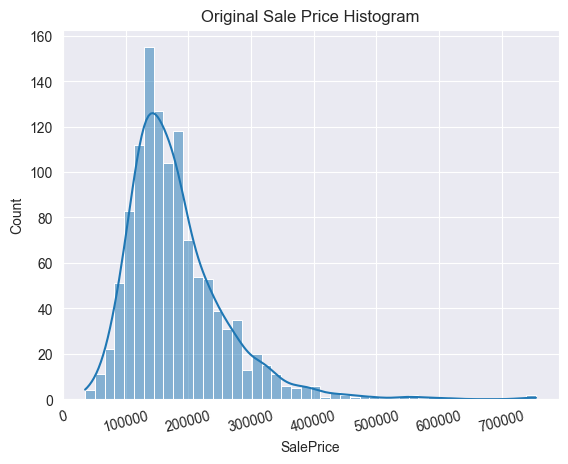

In [85]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(train_df['SalePrice'], kde=True)
plt.show()

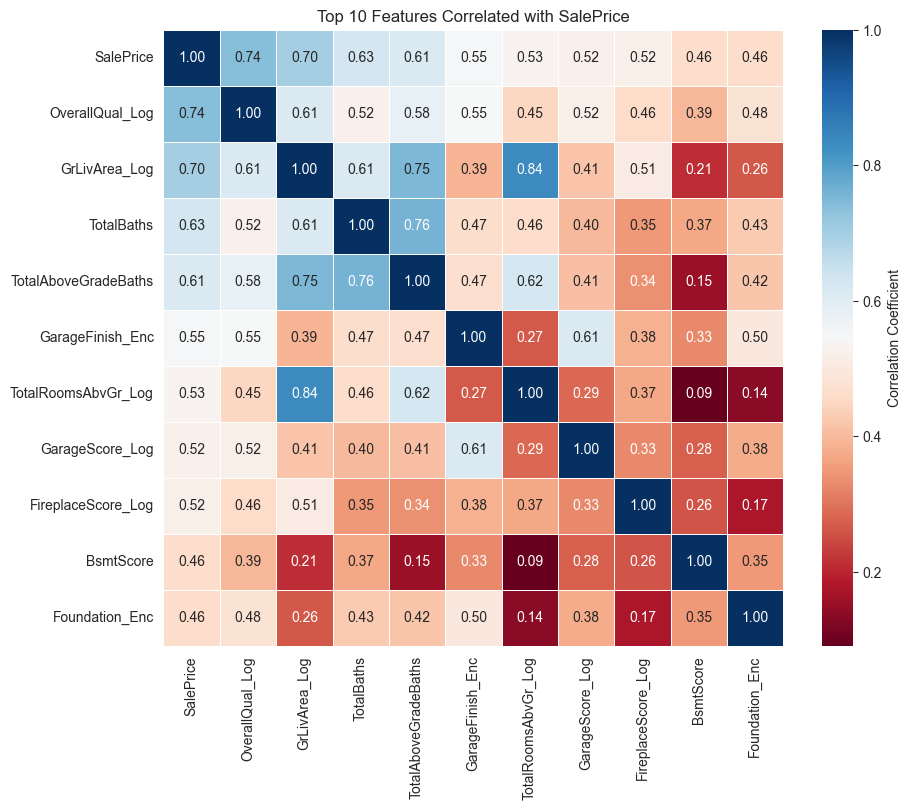

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SalePrice와의 상관관계 계산 및 절댓값 기준 정렬
# SalePrice가 아직 house_df에 남아있다고 가정합니다.
correlation_with_saleprice = house_df.corr()['SalePrice'].sort_values(ascending=False)

# 2. 상위 N개(예: 10개) 특성 선택 (SalePrice 자기 자신 포함)
# SalePrice와의 상관관계가 높은 상위 11개 특성 이름을 가져옵니다.
# (11개인 이유는 SalePrice 자신도 포함되기 때문입니다.)
N = 10
top_features = correlation_with_saleprice.head(N + 1).index.tolist()

# 3. 선택된 특성들만으로 새로운 상관관계 행렬 생성
corr_subset = house_df[top_features].corr()

# 4. 히트맵 시각화
plt.figure(figsize=(10, 8))
# annot=True: 상관계수 값 표시, fmt='.2f': 소수점 2자리까지 표시
sns.heatmap(
    corr_subset,
    annot=True,
    fmt='.2f',
    cmap='RdBu',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title(f'Top {N} Features Correlated with SalePrice')
plt.show()

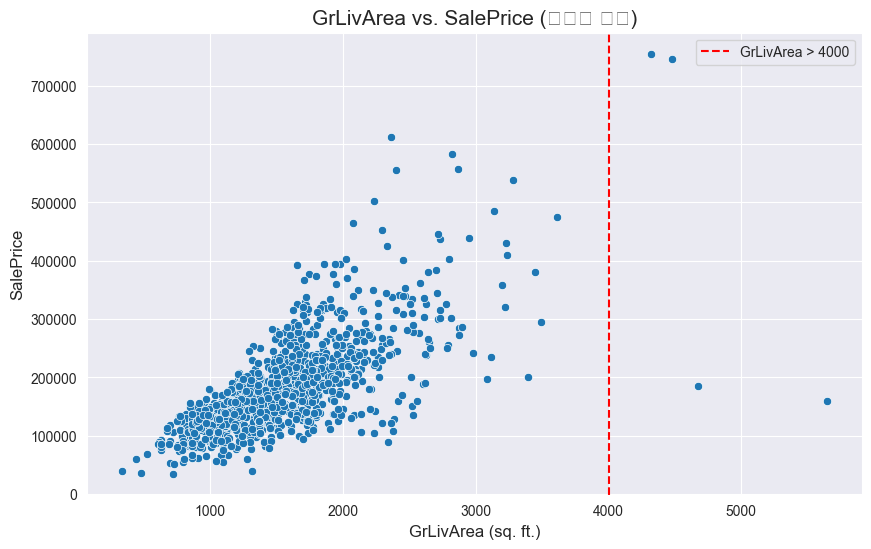

✅ 위 그래프의 오른쪽 하단에 위치한 2개의 점이 모델 학습을 방해하는 주요 이상치입니다.


In [87]:
# --- [추가] 이상치(Outlier) 시각적 확인 ---
# GrLivArea(지상 생활 면적)와 SalePrice의 관계를 산점도로 확인합니다.
# 면적이 매우 넓음에도 불구하고 가격이 비정상적으로 낮은 데이터 포인트를 찾아봅니다.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs. SalePrice (이상치 확인)', fontsize=15)
plt.xlabel('GrLivArea (sq. ft.)', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
# 이상치가 의심되는 GrLivArea > 4000 영역에 수직선을 그어 강조합니다.
plt.axvline(x=4000, color='r', linestyle='--', label='GrLivArea > 4000')
plt.legend()
plt.grid(True)
plt.show()

print("✅ 위 그래프의 오른쪽 하단에 위치한 2개의 점이 모델 학습을 방해하는 주요 이상치입니다.")

In [88]:
# SalePrice 로그 변환
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

house_df['SalePrice'].head()


0    11.813037
1    12.095147
2    12.078245
3    12.669810
4    11.719134
Name: SalePrice, dtype: float64

✅ 총 37개의 수치형 특성에 대한 분포를 시각화합니다.


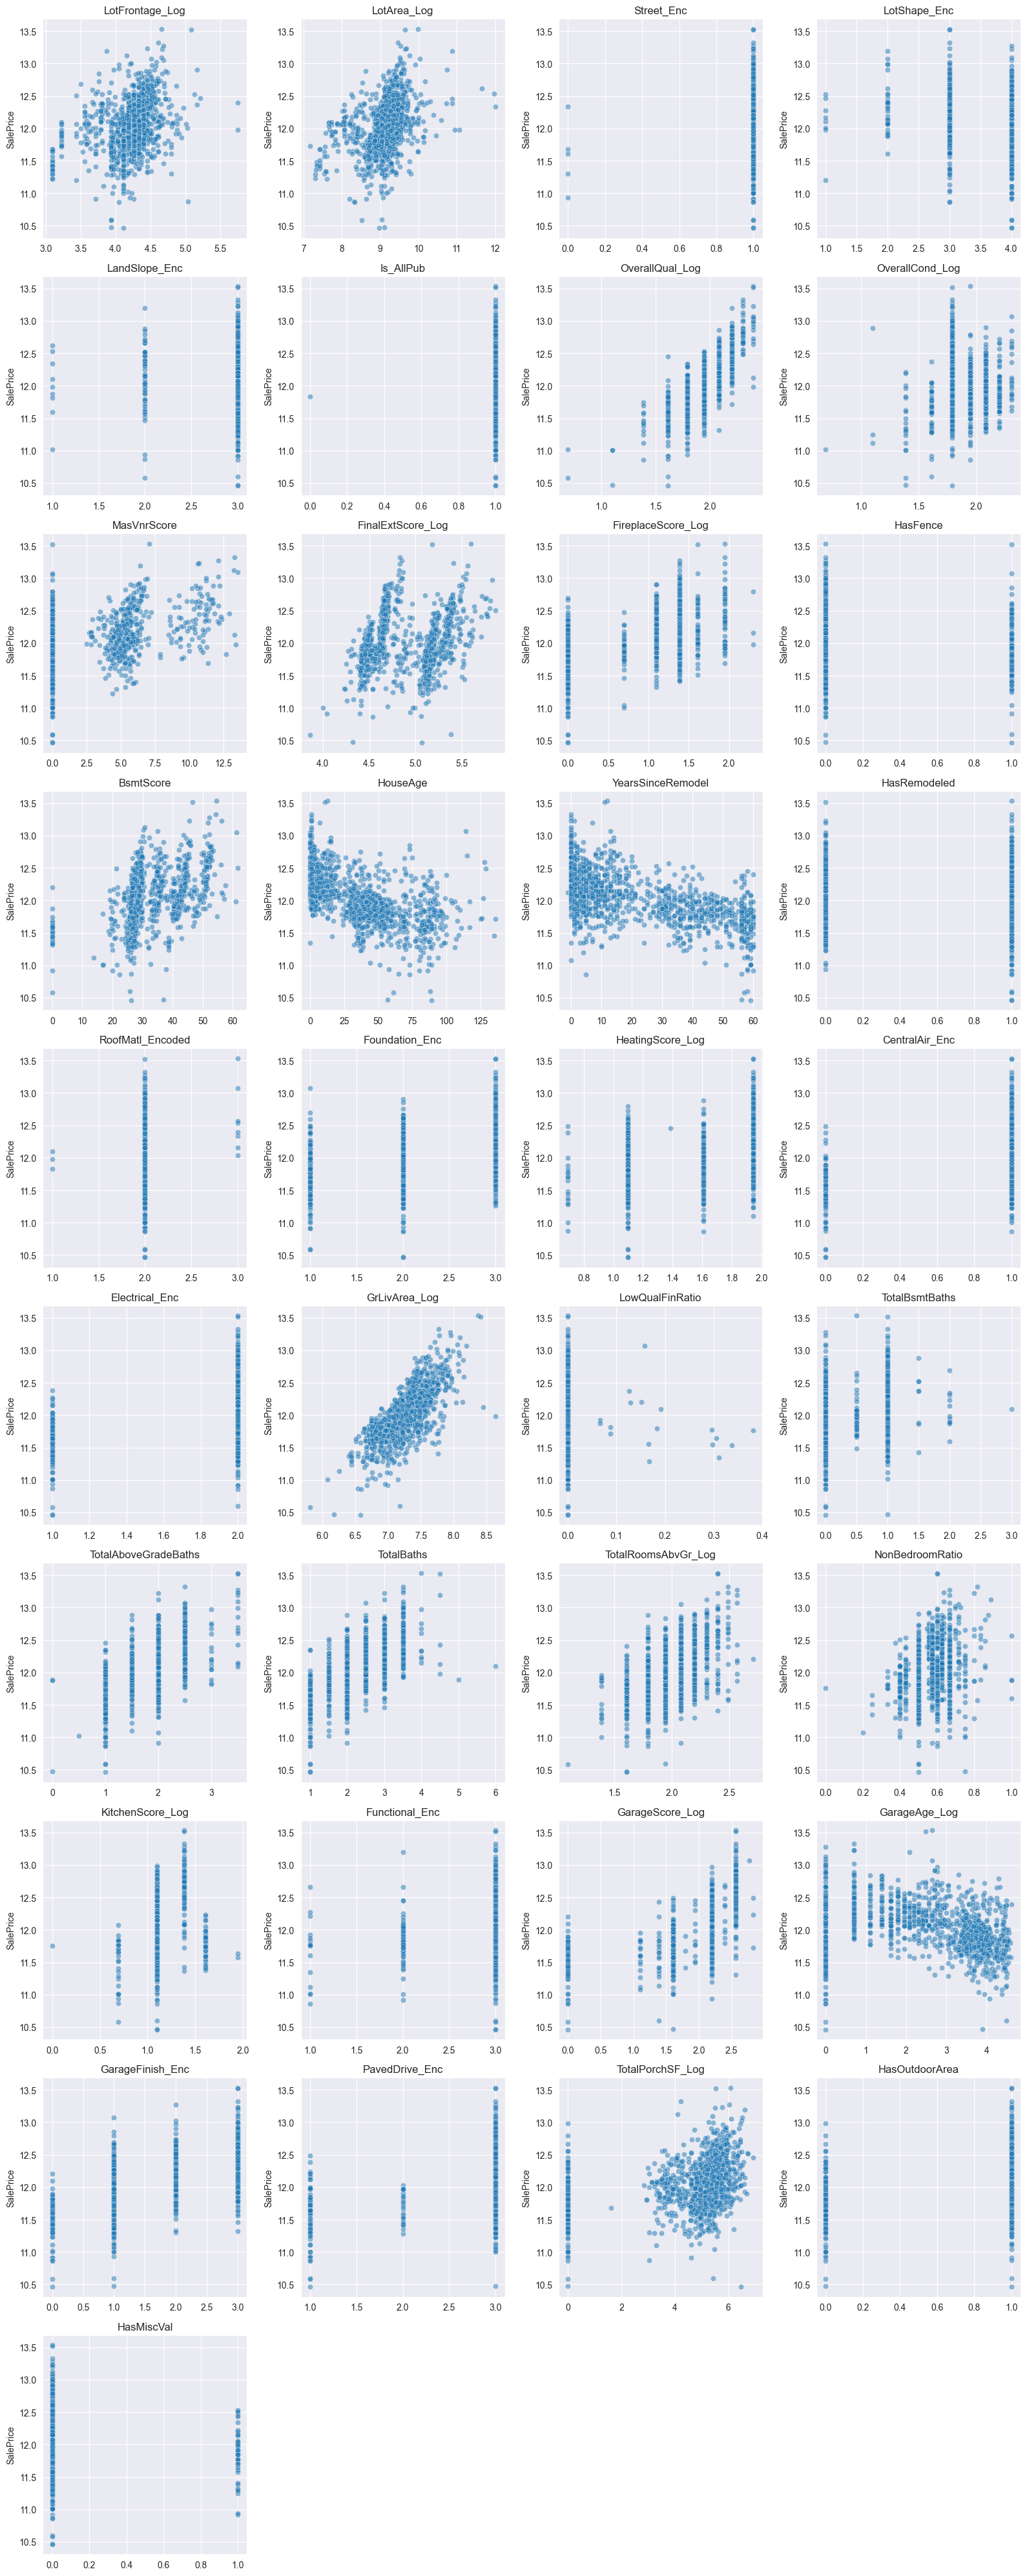

In [89]:
# --- [수정] 전체 수치형 특성에 대한 이상치 시각적 확인 ---

# 1. 원본 훈련 데이터에서 숫자형 특성만 선택
# (Id, SalePrice 및 이산적인 값들은 제외하고 의미있는 연속형/순서형 특성 위주로 선정)
numerical_features = house_df.select_dtypes(include=np.number)

# 분석에서 제외할 컬럼들 (ID, 월/년도 등 범주형에 가까운 숫자)
cols_to_exclude = ['Id', 'MSSubClass', 'MoSold', 'YrSold']
# SalePrice가 있는 경우에만 시각화에 포함
if 'SalePrice' in numerical_features.columns:
    cols_to_exclude.append('SalePrice')

features_to_plot = [col for col in numerical_features.columns if col not in cols_to_exclude]

# 2. 서브플롯(Subplot) 레이아웃 설정
n_features = len(features_to_plot)
n_cols = 4  # 한 줄에 4개의 그래프
n_rows = (n_features + n_cols - 1) // n_cols  # 필요한 행의 수

# 3. 전체 그래프 그리기
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, max(4, n_rows * 4)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

print(f"✅ 총 {n_features}개의 수치형 특성에 대한 분포를 시각화합니다.")

for i, col in enumerate(features_to_plot):
    # SalePrice가 있는 경우와 없는 경우에 따라 시각화 방식 분기
    if 'SalePrice' in house_df.columns:
        sns.scatterplot(x=col, y='SalePrice', data=house_df, ax=axes[i], alpha=0.5)
        axes[i].set_ylabel('SalePrice')
    else:
        sns.histplot(house_df[col], ax=axes[i], kde=True)
        axes[i].set_ylabel('Count')

    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')

# 남는 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

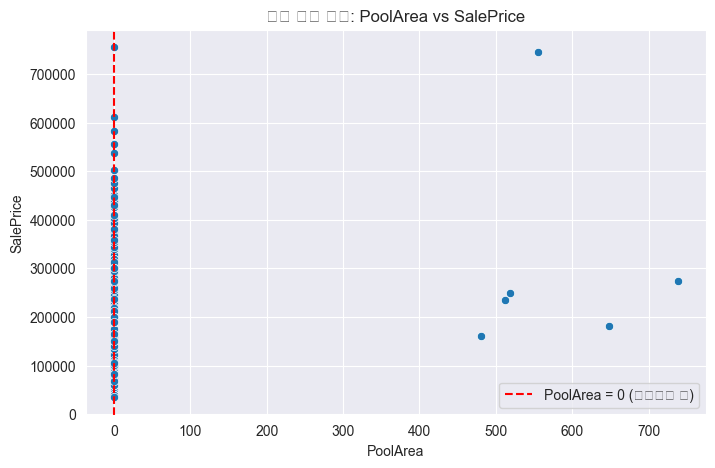

🔴 x=0의 세로선: 수영장이 없는 대다수의 집
🟢 오른쪽의 점들: 수영장이 있는 소수의 집 (가격에 큰 영향을 줌)


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PoolArea', y='SalePrice', data=train_df)
plt.axvline(x=0, color='r', linestyle='--', label='PoolArea = 0 (대부분의 집)')
plt.title('희소 특성 예시: PoolArea vs SalePrice')
plt.legend()
plt.show()

print("🔴 x=0의 세로선: 수영장이 없는 대다수의 집")
print("🟢 오른쪽의 점들: 수영장이 있는 소수의 집 (가격에 큰 영향을 줌)")

✅ 총 37개의 수치형 특성에 대한 분포를 시각화합니다.


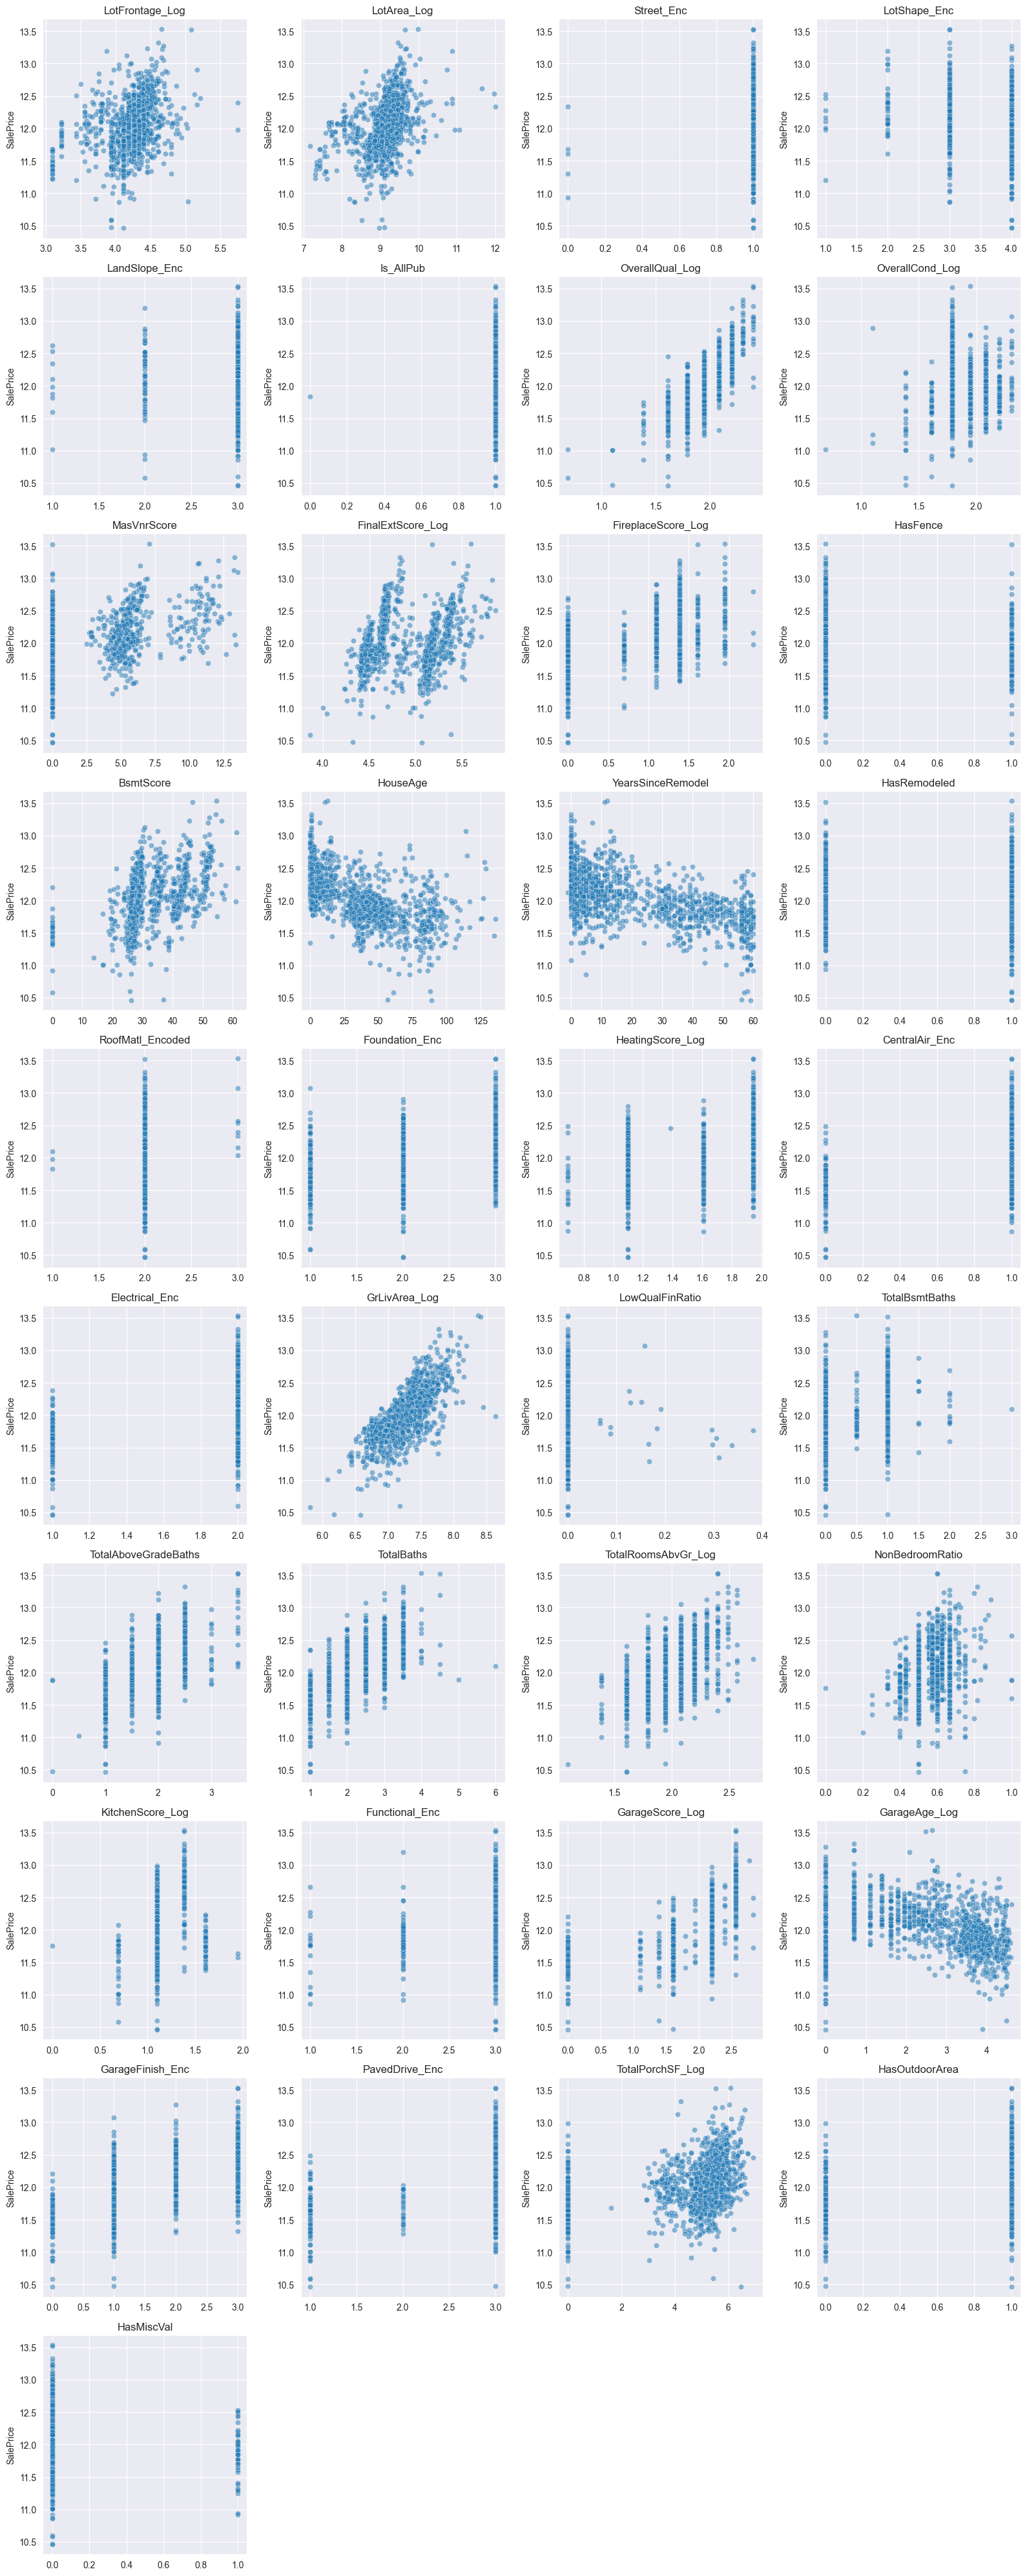

In [91]:
# --- [수정] 전체 수치형 특성에 대한 이상치 시각적 확인 ---

# 1. 원본 훈련 데이터에서 숫자형 특성만 선택
# (Id, SalePrice 및 이산적인 값들은 제외하고 의미있는 연속형/순서형 특성 위주로 선정)
numerical_features = house_df.select_dtypes(include=np.number)

# 분석에서 제외할 컬럼들 (ID, 월/년도 등 범주형에 가까운 숫자)
cols_to_exclude = ['Id', 'MSSubClass', 'MoSold', 'YrSold']
# SalePrice가 있는 경우에만 시각화에 포함
if 'SalePrice' in numerical_features.columns:
    cols_to_exclude.append('SalePrice')

features_to_plot = [col for col in numerical_features.columns if col not in cols_to_exclude]

# 2. 서브플롯(Subplot) 레이아웃 설정
n_features = len(features_to_plot)
n_cols = 4  # 한 줄에 4개의 그래프
n_rows = (n_features + n_cols - 1) // n_cols  # 필요한 행의 수

# 3. 전체 그래프 그리기
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, max(4, n_rows * 4)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

print(f"✅ 총 {n_features}개의 수치형 특성에 대한 분포를 시각화합니다.")

for i, col in enumerate(features_to_plot):
    # SalePrice가 있는 경우와 없는 경우에 따라 시각화 방식 분기
    if 'SalePrice' in house_df.columns:
        sns.scatterplot(x=col, y='SalePrice', data=house_df, ax=axes[i], alpha=0.5)
        axes[i].set_ylabel('SalePrice')
    else:
        sns.histplot(house_df[col], ax=axes[i], kde=True)
        axes[i].set_ylabel('Count')

    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')

# 남는 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [92]:
# --- [추가] 이상치 제거 (성능 향상에 매우 중요) ---
# GrLivArea가 4000 이상이면서 SalePrice가 비정상적으로 낮은 2개의 데이터 포인트를 제거합니다.
# 이는 많은 상위권 커널에서 사용하는 일반적인 전처리 단계입니다.

print(f"이상치 제거 전 train_df 크기: {train_df.shape}")

# 이상치 데이터의 인덱스를 찾습니다.
outlier_indices = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index

# 해당 인덱스의 데이터를 train_df에서 삭제합니다.
train_df = train_df.drop(outlier_indices)

print(f"이상치 제거 후 train_df 크기: {train_df.shape}")
print("✅ GrLivArea 기반 이상치 2건 제거 완료.")

이상치 제거 전 train_df 크기: (1168, 81)
이상치 제거 후 train_df 크기: (1166, 81)
✅ GrLivArea 기반 이상치 2건 제거 완료.


In [93]:
# --- 최종 데이터셋 생성 ---
# 1. 노트북 시작부터 순차적으로 실행하며 만들어진 house_df를 사용합니다.
# 이 house_df는 이상치 제거가 반영된 train_df로부터 모든 전처리가 완료된 상태입니다.
house_df_final = house_df.copy()

# 2. 타겟 변수(y)와 피처(X) 분리
y = np.log1p(house_df_final['SalePrice'])
X = house_df_final.drop('SalePrice', axis=1)

# 숫자형 데이터만 선택
X = X.select_dtypes(include=np.number)

# 무한대(inf) 값을 NaN으로 변환
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN 값 확인 및 중앙값으로 대체
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

# 준-상수 컬럼(IQR=0) 제거
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1 
quasi_constant_columns = IQR[IQR == 0].index.tolist()
if quasi_constant_columns:
    print(f"준-상수 특성 제거: {quasi_constant_columns}")
    X = X.drop(columns=quasi_constant_columns)

print("\n--- 최종 데이터 준비 완료 (이상치 제거 반영됨) ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X에 NaN/inf 값 개수: {X.isnull().sum().sum() + np.isinf(X).sum().sum()}")
print(f"y에 NaN/inf 값 개수: {y.isnull().sum() + np.isinf(y).sum()}")
print(f"\n로그 변환된 y의 통계량:\n{y.describe()}")

준-상수 특성 제거: ['Street_Enc', 'LandSlope_Enc', 'Is_AllPub', 'HasFence', 'RoofMatl_Encoded', 'CentralAir_Enc', 'Electrical_Enc', 'LowQualFinRatio', 'KitchenScore_Log', 'Functional_Enc', 'PavedDrive_Enc', 'HasOutdoorArea', 'HasMiscVal']

--- 최종 데이터 준비 완료 (이상치 제거 반영됨) ---
X shape: (1168, 24)
y shape: (1168,)
X에 NaN/inf 값 개수: 0
y에 NaN/inf 값 개수: 0

로그 변환된 y의 통계량:
count    1168.000000
mean        2.566061
std         0.030641
min         2.438886
25%         2.547212
50%         2.565534
75%         2.585457
max         2.676523
Name: SalePrice, dtype: float64


In [94]:
# Optuna 튜닝을 위한 추가 임포트
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
import numpy as np

# 모델 임포트
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# 튜닝 결과 저장을 위한 딕셔너리 초기화
tuning_results_regression = {}


# RMSE 계산 헬퍼 함수
def get_rmse(y_true_log, y_pred_log):
    """
    로그 변환된 실제값과 예측값으로 RMSE를 계산합니다.
    이는 원본 스케일의 RMSLE와 같습니다.
    """
    # 예측값이 무한대(inf)나 NaN인 경우 큰 페널티를 부여합니다.
    if not np.all(np.isfinite(y_pred_log)):
        return 1e8 # 매우 큰 오류 값 반환

    # np.sqrt()는 음수를 처리할 수 없으므로, 음수가 나오지 않도록 clip 처리
    mse = mean_squared_error(y_true_log, y_pred_log)
    return np.sqrt(mse)


# Optuna 시각화 헬퍼 함수
def visualize_tuning_results(study, model_name):
    """완료된 Optuna study 객체를 받아 시각화 자료를 생성하는 함수"""
    print(f"\n--- {model_name} 튜닝 과정 시각화 ---")
    try:
        fig1 = optuna.visualization.plot_optimization_history(study)
        fig1.show()
    except Exception as e:
        print(f"최적화 과정 시각화 실패: {e}")

    try:
        fig2 = optuna.visualization.plot_param_importances(study)
        fig2.show()
    except Exception as e:
        print(f"파라미터 중요도 시각화 실패: {e}")


print("✅ Optuna 튜닝을 위한 공통 설정 및 헬퍼 함수 정의 완료.")

✅ Optuna 튜닝을 위한 공통 설정 및 헬퍼 함수 정의 완료.


In [95]:
# --- Linear Regression 튜닝 (RobustScaler 사용) ---
from sklearn.preprocessing import RobustScaler  # RobustScaler 임포트

# 1. 튜닝 설정
MODEL_NAME = "Linear Regression"
N_TRIALS = 100
N_SPLITS = 7


# 2. Optuna Objective 함수 정의
def objective_linear_regression(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    # ★★★★★ 수정된 부분 ★★★★★
    # StandardScaler 대신 RobustScaler를 사용합니다.
    model = Pipeline([
        ('scaler', RobustScaler()),
        ('linear_regression', LinearRegression(fit_intercept=fit_intercept, n_jobs=-1))
    ])

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        y_pred_log = model.predict(X_val)

        # 예측값에 inf 또는 NaN이 있는지 직접 확인합니다.
        if not np.all(np.isfinite(y_pred_log)):
            return 1e8  # 비정상적인 예측 시 큰 오류 값 반환

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_linear_regression = optuna.create_study(direction="minimize")
study_linear_regression.optimize(
    objective_linear_regression,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_linear_regression.best_params
best_value = study_linear_regression.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_linear_regression}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_linear_regression, MODEL_NAME)

[I 2025-11-12 21:57:30,235] A new study created in memory with name: no-name-3f282a2c-d1ff-417e-ab25-23877e74a204


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-11-12 21:57:30,320] Trial 0 finished with value: 0.8293566532631814 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.8293566532631814.
[I 2025-11-12 21:57:30,382] Trial 1 finished with value: 0.8293566532631814 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.8293566532631814.
[I 2025-11-12 21:57:30,454] Trial 2 finished with value: 0.011380913174230772 and parameters: {'fit_intercept': True}. Best is trial 2 with value: 0.011380913174230772.
[I 2025-11-12 21:57:30,526] Trial 3 finished with value: 0.8293566532631814 and parameters: {'fit_intercept': False}. Best is trial 2 with value: 0.011380913174230772.
[I 2025-11-12 21:57:30,585] Trial 4 finished with value: 0.011380913174230772 and parameters: {'fit_intercept': True}. Best is trial 2 with value: 0.011380913174230772.
[I 2025-11-12 21:57:30,651] Trial 5 finished with value: 0.011380913174230772 and parameters: {'fit_intercept': True}. Best is trial 2 with value: 0.0113809131742

In [96]:
# --- Ridge Regression 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Ridge"
N_TRIALS = 100  # 튜닝 시도 횟수
N_SPLITS = 7   # 교차 검증 폴드 수

# 2. Optuna Objective 함수 정의
def objective_ridge(trial):
    # 하이퍼파라미터 'alpha'의 탐색 공간을 정의합니다. (정규화 강도)
    # 1e-3 (0.001) 부터 1e2 (100) 사이의 로그 스케일에서 값을 찾습니다.
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e4)

    # 모델을 StandardScaler와 함께 파이프라인으로 구성합니다.
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha, random_state=42))
    ])

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 이전 셀에서 정의한 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    # Optuna는 이 값을 최소화하는 방향으로 하이퍼파라미터를 탐색합니다.
    return np.mean(scores)

# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(
    objective_ridge,
    n_trials=N_TRIALS,
    show_progress_bar=True # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_ridge.best_params
best_value = study_ridge.best_value
tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_ridge}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_ridge, MODEL_NAME)

[I 2025-11-12 21:58:52,477] A new study created in memory with name: no-name-4edccb20-e914-4626-9fc8-d2214b6d8f54


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-11-12 21:58:52,526] Trial 0 finished with value: 0.011380878486897093 and parameters: {'alpha': 0.35958102228136046}. Best is trial 0 with value: 0.011380878486897093.
[I 2025-11-12 21:58:52,568] Trial 1 finished with value: 0.011380907973082851 and parameters: {'alpha': 0.04736448268532471}. Best is trial 0 with value: 0.011380878486897093.
[I 2025-11-12 21:58:52,604] Trial 2 finished with value: 0.01138093315657698 and parameters: {'alpha': 2.9038677075822834}. Best is trial 0 with value: 0.011380878486897093.
[I 2025-11-12 21:58:52,639] Trial 3 finished with value: 0.02068328070302888 and parameters: {'alpha': 9594.761810285814}. Best is trial 0 with value: 0.011380878486897093.
[I 2025-11-12 21:58:52,673] Trial 4 finished with value: 0.01601248097915151 and parameters: {'alpha': 3691.703286094258}. Best is trial 0 with value: 0.011380878486897093.
[I 2025-11-12 21:58:52,702] Trial 5 finished with value: 0.011380908535944928 and parameters: {'alpha': 0.04215274943090213}. Be

In [97]:
# --- Lasso Regression 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Lasso"
N_TRIALS = 100  # 튜닝 시도 횟수
N_SPLITS = 7  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_lasso(trial):
    # 하이퍼파라미터 'alpha'의 탐색 공간을 정의합니다. (정규화 강도)
    # 1e-4 (0.0001) 부터 1e1 (10) 사이의 로그 스케일에서 값을 찾습니다.
    # Lasso는 alpha가 너무 크면 많은 계수가 0이 되므로, Ridge보다 작은 범위에서 탐색하는 것이 좋습니다.
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e4)

    # 모델을 StandardScaler와 함께 파이프라인으로 구성합니다.
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, random_state=42, max_iter=2000))  # max_iter를 늘려 수렴 보장
    ])

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 이전 셀에서 정의한 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    # Optuna는 이 값을 최소화하는 방향으로 하이퍼파라미터를 탐색합니다.
    return np.mean(scores)


# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_lasso = optuna.create_study(direction="minimize")
study_lasso.optimize(
    objective_lasso,
    n_trials=N_TRIALS,
    show_progress_bar=True  # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_lasso.best_params
best_value = study_lasso.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_lasso}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_lasso, MODEL_NAME)


[I 2025-11-12 21:59:29,902] A new study created in memory with name: no-name-a9d7f538-43b7-44fd-93f5-34bed20306e4


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-11-12 21:59:29,949] Trial 0 finished with value: 0.01167213202949323 and parameters: {'alpha': 0.00103193335339008}. Best is trial 0 with value: 0.01167213202949323.
[I 2025-11-12 21:59:29,987] Trial 1 finished with value: 0.030592237017766366 and parameters: {'alpha': 0.11020203146860619}. Best is trial 0 with value: 0.01167213202949323.
[I 2025-11-12 21:59:30,023] Trial 2 finished with value: 0.030592237017766366 and parameters: {'alpha': 0.5318229605354124}. Best is trial 0 with value: 0.01167213202949323.
[I 2025-11-12 21:59:30,061] Trial 3 finished with value: 0.011636414588413921 and parameters: {'alpha': 0.0009625902248384185}. Best is trial 3 with value: 0.011636414588413921.
[I 2025-11-12 21:59:30,095] Trial 4 finished with value: 0.023983085344781448 and parameters: {'alpha': 0.016150058719466526}. Best is trial 3 with value: 0.011636414588413921.
[I 2025-11-12 21:59:30,133] Trial 5 finished with value: 0.011365639055250707 and parameters: {'alpha': 0.0001915737394116

In [98]:
# --- Elastic Net 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Elastic Net"
N_TRIALS = 1000  # 튜닝 시도 횟수
N_SPLITS = 7  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_elasticnet(trial):
    # 하이퍼파라미터 'alpha' (정규화 강도)와 'l1_ratio' (L1 비율)의 탐색 공간을 정의합니다.
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)  # 0은 Ridge, 1은 Lasso와 유사

    # 모델을 StandardScaler와 함께 파이프라인으로 구성합니다.
    model = Pipeline([
        ('scaler', RobustScaler()), # StandardScaler -> RobustScaler로 변경
        ('elasticnet', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=2000))  # max_iter를 늘려 수렴 보장
    ])

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 이전 셀에서 정의한 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    # Optuna는 이 값을 최소화하는 방향으로 하이퍼파라미터를 탐색합니다.
    return np.mean(scores)


# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_elasticnet = optuna.create_study(direction="minimize")
study_elasticnet.optimize(
    objective_elasticnet,
    n_trials=N_TRIALS,
    show_progress_bar=True  # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_elasticnet.best_params
best_value = study_elasticnet.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_elasticnet}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_elasticnet, MODEL_NAME)

[I 2025-11-12 22:00:13,033] A new study created in memory with name: no-name-ff141968-fba6-4a93-b4b4-9b2d9a722d59


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-11-12 22:00:13,104] Trial 0 finished with value: 0.011372932302130948 and parameters: {'alpha': 0.0014438000594253772, 'l1_ratio': 0.048087561308980065}. Best is trial 0 with value: 0.011372932302130948.
[I 2025-11-12 22:00:13,154] Trial 1 finished with value: 0.030592237017766366 and parameters: {'alpha': 0.08946916521656767, 'l1_ratio': 0.8078118233116133}. Best is trial 0 with value: 0.011372932302130948.
[I 2025-11-12 22:00:13,204] Trial 2 finished with value: 0.01194001295180114 and parameters: {'alpha': 0.002660238488420928, 'l1_ratio': 0.3848267937106067}. Best is trial 0 with value: 0.011372932302130948.
[I 2025-11-12 22:00:13,249] Trial 3 finished with value: 0.021060892953485077 and parameters: {'alpha': 0.013407789671966212, 'l1_ratio': 0.7255746052533149}. Best is trial 0 with value: 0.011372932302130948.
[I 2025-11-12 22:00:13,295] Trial 4 finished with value: 0.011368124287343193 and parameters: {'alpha': 0.00015527870594016972, 'l1_ratio': 0.3488944755880753}. Be

In [99]:
# --- Decision Tree Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Decision Tree"
N_TRIALS = 50  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_decision_tree(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Decision Tree Regressor 모델을 생성합니다.
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    return np.mean(scores)


# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_decision_tree = optuna.create_study(direction="minimize")
study_decision_tree.optimize(
    objective_decision_tree,
    n_trials=N_TRIALS,
    show_progress_bar=True  # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_decision_tree.best_params
best_value = study_decision_tree.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_decision_tree}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_decision_tree, MODEL_NAME)

[I 2025-11-12 22:01:28,046] A new study created in memory with name: no-name-fa628e8a-66b0-46ad-95a3-b39e1a678d4c


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-12 22:01:28,094] Trial 0 finished with value: 0.01627519978497461 and parameters: {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.01627519978497461.
[I 2025-11-12 22:01:28,136] Trial 1 finished with value: 0.016321075763293946 and parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.01627519978497461.
[I 2025-11-12 22:01:28,194] Trial 2 finished with value: 0.017479702261832455 and parameters: {'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.01627519978497461.
[I 2025-11-12 22:01:28,232] Trial 3 finished with value: 0.01650827216807988 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.01627519978497461.
[I 2025-11-12 22:01:28,276] Trial 4 finished with value: 0.016651191241473857 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is

In [100]:
# --- Random Forest Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Random Forest"
N_TRIALS = 50  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_random_forest(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 25)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.6, 0.8, 1.0])

    # Random Forest Regressor 모델을 생성합니다.
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1  # 가능한 경우 모든 코어 사용
    )

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    return np.mean(scores)


# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_random_forest = optuna.create_study(direction="minimize")
study_random_forest.optimize(
    objective_random_forest,
    n_trials=N_TRIALS,
    show_progress_bar=True  # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_random_forest.best_params
best_value = study_random_forest.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_random_forest}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_random_forest, MODEL_NAME)

[I 2025-11-12 22:01:31,076] A new study created in memory with name: no-name-baf659eb-c08a-486f-a882-15f1233db8d7


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-12 22:01:33,423] Trial 0 finished with value: 0.011922019230431754 and parameters: {'n_estimators': 277, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 0 with value: 0.011922019230431754.
[I 2025-11-12 22:01:34,634] Trial 1 finished with value: 0.012045261235568741 and parameters: {'n_estimators': 191, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.011922019230431754.
[I 2025-11-12 22:01:36,287] Trial 2 finished with value: 0.012095259874608803 and parameters: {'n_estimators': 206, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 0 with value: 0.011922019230431754.
[I 2025-11-12 22:01:37,027] Trial 3 finished with value: 0.01241891610805943 and parameters: {'n_estimators': 55, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 0.011922019230

In [101]:
# --- Gradient Boosting Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Gradient Boosting"
N_TRIALS = 50  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_gradient_boosting(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)  # 각 트리 학습에 사용할 샘플 비율
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # 각 트리 학습에 사용할 특성 비율

    # --- [수정] Gradient Boosting Regressor 모델 생성 시 조기 종료 옵션 추가 ---
    # n_iter_no_change: 지정된 반복 횟수 동안 검증 점수가 향상되지 않으면 학습을 조기 종료합니다.
    # validation_fraction: 조기 종료를 위한 검증 데이터로 사용할 훈련 데이터의 비율입니다.
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        random_state=42,
        # 조기 종료 활성화
        n_iter_no_change=50,  # 50번의 반복 동안 성능 향상이 없으면 중단
        validation_fraction=0.1, # 훈련 데이터의 10%를 검증용으로 사용
        tol=1e-4 # 조기 종료를 판단할 최소 개선 값
    )

    # --- 교차 검증 루프 ---
    # K-Fold 교차 검증을 설정합니다.
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    # 각 폴드에 대해 학습 및 평가를 반복합니다.
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    return np.mean(scores)


# 3. 튜닝 실행
# 'minimize' 방향으로 설정하여 RMSE를 최소화하는 최적의 파라미터를 찾습니다.
study_gradient_boosting = optuna.create_study(direction="minimize")
study_gradient_boosting.optimize(
    objective_gradient_boosting,
    n_trials=N_TRIALS,
    show_progress_bar=True  # 진행 상황을 시각적으로 보여줍니다.
)

# 4. 결과 저장 및 시각화
best_params = study_gradient_boosting.best_params
best_value = study_gradient_boosting.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_gradient_boosting}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

# 시각화 함수를 호출하여 튜닝 과정을 그래프로 확인합니다.
visualize_tuning_results(study_gradient_boosting, MODEL_NAME)

[I 2025-11-12 22:02:57,844] A new study created in memory with name: no-name-6d5754f8-8148-4e7c-892a-a7a884df222e


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-12 22:02:58,312] Trial 0 finished with value: 0.01138319362039492 and parameters: {'n_estimators': 673, 'learning_rate': 0.1233470175069164, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 2, 'subsample': 0.7847421245037047, 'max_features': 'log2'}. Best is trial 0 with value: 0.01138319362039492.
[I 2025-11-12 22:02:59,856] Trial 1 finished with value: 0.014086811579408137 and parameters: {'n_estimators': 921, 'learning_rate': 0.014149955910828913, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'subsample': 0.6752868615500355, 'max_features': None}. Best is trial 0 with value: 0.01138319362039492.
[I 2025-11-12 22:03:01,961] Trial 2 finished with value: 0.012571164188171408 and parameters: {'n_estimators': 739, 'learning_rate': 0.018040206941794503, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 3, 'subsample': 0.6324500892890811, 'max_features': None}. Best is trial 0 with value: 0.01138319362039492.
[I 2025-11-12 22:03:02,394] Tria

In [102]:
# --- XGBoost Regressor 튜닝 (네이티브 API 사용) ---

# 1. 튜닝 설정
MODEL_NAME = "XGBoost"
N_TRIALS = 30  # 튜닝 시도 횟수
N_SPLITS = 3  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_xgboost(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    # 네이티브 API에 맞는 파라미터 구조
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'seed': 42,
        'n_jobs': -1,
        'tree_method': 'hist',
        'device': 'cuda'
    }
    # n_estimators는 xgb.train에서 num_boost_round로 별도 지정
    num_boost_round = trial.suggest_int('n_estimators', 100, 500)

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # ★★★★★ 핵심 수정: XGBoost 네이티브 데이터 구조(DMatrix)로 변환 ★★★★★
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dval = xgb.DMatrix(X_val, label=y_val)
        evals = [(dtrain, 'train'), (dval, 'eval')]

        # ★★★★★ 핵심 수정: xgb.train 함수 사용 ★★★★★
        model = xgb.train(
            params=param,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            early_stopping_rounds=50,
            verbose_eval=False  # 학습 과정 로그 출력 안 함
        )

        # 네이티브 모델은 DMatrix로 예측합니다.
        y_pred_log = model.predict(dval)
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_xgboost = optuna.create_study(direction="minimize")
study_xgboost.optimize(
    objective_xgboost,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_xgboost.best_params
best_value = study_xgboost.best_value

# 네이티브 API로 튜닝했으므로, 나중에 scikit-learn 래퍼에서 사용할 수 있도록 파라미터를 정리합니다.
# (n_estimators는 num_boost_round에서 가져온 값)
best_params_for_wrapper = best_params.copy()
if 'n_estimators' not in best_params_for_wrapper:
    # Optuna가 n_estimators를 저장하지 않은 경우를 대비 (보통은 저장됨)
    best_trial = study_xgboost.best_trial
    best_params_for_wrapper['n_estimators'] = best_trial.params.get('n_estimators', 500)

tuning_results_regression[MODEL_NAME] = {'best_params': best_params_for_wrapper, 'best_value': best_value,
                                         'study': study_xgboost}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_xgboost, MODEL_NAME)

[I 2025-11-12 22:03:35,572] A new study created in memory with name: no-name-e01aa40f-4dbc-4e14-9727-fbad976cd650


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 22:03:38,534] Trial 0 finished with value: 0.015602796761858925 and parameters: {'booster': 'gbtree', 'lambda': 1.931796290776334, 'alpha': 1.3163608646291385, 'colsample_bytree': 0.9907571159322077, 'subsample': 0.8423053838416592, 'learning_rate': 0.1825453360321822, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 298}. Best is trial 0 with value: 0.015602796761858925.
[I 2025-11-12 22:06:37,201] Trial 1 finished with value: 0.011054741739263976 and parameters: {'booster': 'dart', 'lambda': 0.0024870493480046336, 'alpha': 0.008269898279299963, 'colsample_bytree': 0.9029508365809785, 'subsample': 0.5292446480802533, 'learning_rate': 0.0398365188179755, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 459}. Best is trial 1 with value: 0.011054741739263976.
[I 2025-11-12 22:07:14,768] Trial 2 finished with value: 0.013346533812195083 and parameters: {'booster': 'dart', 'lambda': 7.065778966881581, 'alpha': 0.001308232101303186, 'colsample_bytree': 0.7170770544

KeyboardInterrupt: 

In [103]:
# --- LightGBM Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "LightGBM"
N_TRIALS = 30  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_lightgbm(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    param = {
        'objective': 'regression_l1',  # 회귀 문제의 목적 함수 (MAE)
        'metric': 'rmse',  # 평가 지표
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),  # L1 정규화
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),  # L2 정규화
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,  # 학습 과정 메시지 출력 안 함
        'device': 'gpu'  # GPU 사용 설정
    }

    # LightGBM Regressor 모델을 생성합니다.
    model = lgb.LGBMRegressor(**param)

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',  # 조기 종료를 위한 평가 지표
                  callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])  # 50라운드 동안 성능 향상 없으면 조기 종료

        y_pred_log = model.predict(X_val)
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_lightgbm = optuna.create_study(direction="minimize")
study_lightgbm.optimize(
    objective_lightgbm,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_lightgbm.best_params
best_value = study_lightgbm.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_lightgbm}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_lightgbm, MODEL_NAME)

[I 2025-11-12 22:29:09,715] A new study created in memory with name: no-name-a1920596-3116-4cd0-beaf-55415a1861fe


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 22:29:13,412] Trial 0 finished with value: 0.011905119812378266 and parameters: {'n_estimators': 116, 'learning_rate': 0.056146752604221487, 'num_leaves': 21, 'max_depth': 13, 'min_child_samples': 57, 'subsample': 0.6790481083555164, 'colsample_bytree': 0.7066813201700263, 'reg_alpha': 0.34996880030579103, 'reg_lambda': 1.096845832339355}. Best is trial 0 with value: 0.011905119812378266.
[I 2025-11-12 22:29:16,593] Trial 1 finished with value: 0.013537338334392659 and parameters: {'n_estimators': 211, 'learning_rate': 0.018925481861483018, 'num_leaves': 43, 'max_depth': 7, 'min_child_samples': 92, 'subsample': 0.7678923867811369, 'colsample_bytree': 0.8881199883415294, 'reg_alpha': 7.492542324280781, 'reg_lambda': 7.277359308880059}. Best is trial 0 with value: 0.011905119812378266.
[I 2025-11-12 22:29:22,060] Trial 2 finished with value: 0.011394082377404021 and parameters: {'n_estimators': 288, 'learning_rate': 0.0749333561119152, 'num_leaves': 59, 'max_depth': 7, 'min

In [104]:
# --- CatBoost Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "CatBoost"
N_TRIALS = 30  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_catboost(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    param = {
        'objective': 'RMSE',  # 회귀 문제의 목적 함수
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'random_seed': 42,
        'verbose': 0,  # 학습 과정 메시지 출력 안 함
        'early_stopping_rounds': 50,  # 50라운드 동안 성능 향상 없으면 조기 종료
        'task_type': 'GPU'  # GPU 사용 설정
    }

    # CatBoost Regressor 모델을 생성합니다.
    model = CatBoostRegressor(**param)

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  verbose=False)  # eval_set에 대한 verbose도 False로 설정

        y_pred_log = model.predict(X_val)
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_catboost = optuna.create_study(direction="minimize")
study_catboost.optimize(
    objective_catboost,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_catboost.best_params
best_value = study_catboost.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_catboost}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_catboost, MODEL_NAME)

[I 2025-11-12 22:34:26,531] A new study created in memory with name: no-name-d8b41fca-7158-472e-b4fe-a9de0f2debf1


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 22:34:37,572] Trial 0 finished with value: 0.01123220340509431 and parameters: {'iterations': 269, 'learning_rate': 0.05445320676254984, 'depth': 9, 'l2_leaf_reg': 0.0013186849574877263}. Best is trial 0 with value: 0.01123220340509431.
[I 2025-11-12 22:35:04,610] Trial 1 finished with value: 0.011369669070740138 and parameters: {'iterations': 507, 'learning_rate': 0.18321349049600386, 'depth': 10, 'l2_leaf_reg': 0.2161330243330626}. Best is trial 0 with value: 0.01123220340509431.
[I 2025-11-12 22:37:16,991] Trial 2 finished with value: 0.011231254058126448 and parameters: {'iterations': 863, 'learning_rate': 0.010630369977761346, 'depth': 9, 'l2_leaf_reg': 0.0031170285231323404}. Best is trial 2 with value: 0.011231254058126448.
[I 2025-11-12 22:38:28,364] Trial 3 finished with value: 0.011251824450531366 and parameters: {'iterations': 860, 'learning_rate': 0.010137376641789405, 'depth': 4, 'l2_leaf_reg': 0.10012998803278395}. Best is trial 2 with value: 0.0112312540581

In [105]:
# --- MLP Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "MLP Regressor"
N_TRIALS = 30  # 튜닝 시도 횟수
N_SPLITS = 5  # 교차 검증 폴드 수


# 2. Optuna Objective 함수 정의
def objective_mlp(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    # 은닉층 크기 (튜플 형태)
    hidden_layer_sizes = trial.suggest_categorical(
        'hidden_layer_sizes',
        [(50,), (100,), (50, 50), (100, 50), (100, 100)]
    )
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)  # L2 정규화 (패널티)
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-2)

    # MLP Regressor 모델을 StandardScaler와 함께 파이프라인으로 구성합니다.
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate_init=learning_rate_init,
            random_state=42,
            max_iter=1000,  # 충분한 반복 횟수 설정
            early_stopping=True,  # 검증 점수가 향상되지 않으면 조기 종료
            n_iter_no_change=20  # 20 에포크 동안 개선 없으면 조기 종료
        ))
    ])

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        # 검증 세트에 대한 예측을 수행합니다.
        y_pred_log = model.predict(X_val)

        # 헬퍼 함수를 사용해 RMSE를 계산합니다.
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    # 교차 검증 폴드들의 평균 RMSE를 반환합니다.
    return np.mean(scores)


# 3. 튜닝 실행
study_mlp = optuna.create_study(direction="minimize")
study_mlp.optimize(
    objective_mlp,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_mlp.best_params
best_value = study_mlp.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_mlp}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_mlp, MODEL_NAME)

[I 2025-11-12 22:51:20,744] A new study created in memory with name: no-name-954de8d8-dfd5-4f96-a3d5-851e9a6febcc


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 22:51:33,019] Trial 0 finished with value: 0.041518672597468255 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 7.283539844298766e-05, 'learning_rate_init': 0.006255445805587692}. Best is trial 0 with value: 0.041518672597468255.
[I 2025-11-12 22:51:46,904] Trial 1 finished with value: 0.1309834575964572 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.018078675265056948, 'learning_rate_init': 0.000165790707117564}. Best is trial 0 with value: 0.041518672597468255.
[I 2025-11-12 22:51:52,095] Trial 2 finished with value: 0.07816869154899679 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008270311312707716, 'learning_rate_init': 0.004508560532904479}. Best is trial 0 with value: 0.041518672597468255.
[I 2025-11-12 22:52:00,929] Trial 3 finished with value: 0.2117665185600687 and parameters: {'hidden_layer_sizes': (100,),


--- Optuna 튜닝을 통한 모델별 최종 RMSE 성능 (원본 SalePrice 스케일) ---
               Model  Best_RMSE
8           CatBoost   0.010592
6  Gradient Boosting   0.010947
7           LightGBM   0.010962
2              Lasso   0.011364
3        Elastic Net   0.011367
1              Ridge   0.011381
0  Linear Regression   0.011381
5      Random Forest   0.011476
4      Decision Tree   0.015389
9      MLP Regressor   0.030886


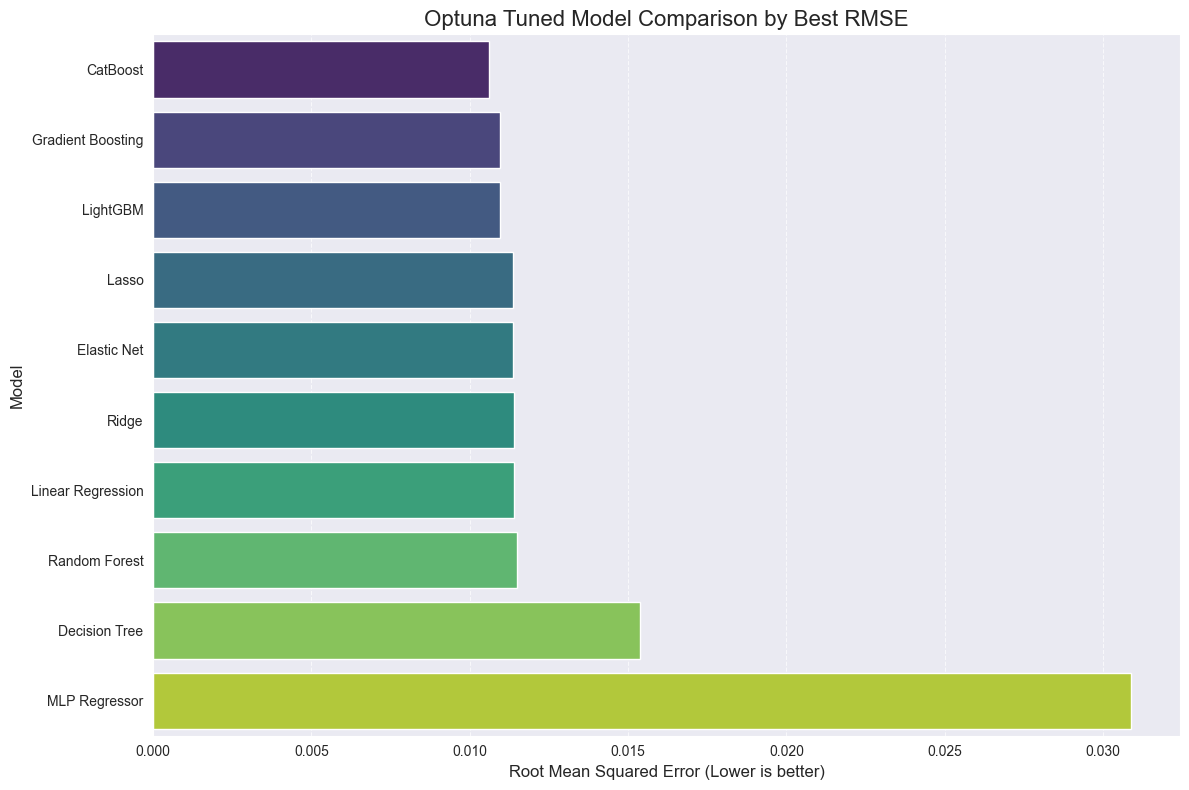


✅ 모든 모델의 Optuna 튜닝 및 최종 결과 비교 완료.


In [106]:
# --- 최종 튜닝 결과 비교 및 시각화 ---

# 1. 튜닝된 모델들의 RMSE 결과 수집
final_rmse_results = {}
for model_name, result in tuning_results_regression.items():
    final_rmse_results[model_name] = result['best_value']

# 2. 결과를 DataFrame으로 변환 및 정렬
results_df = pd.DataFrame(
    list(final_rmse_results.items()),
    columns=['Model', 'Best_RMSE']
).sort_values(by='Best_RMSE', ascending=True)

print("\n--- Optuna 튜닝을 통한 모델별 최종 RMSE 성능 (원본 SalePrice 스케일) ---")
print(results_df)

# 3. 결과 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Best_RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Optuna Tuned Model Comparison by Best RMSE', fontsize=16)
plt.xlabel('Root Mean Squared Error (Lower is better)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n✅ 모든 모델의 Optuna 튜닝 및 최종 결과 비교 완료.")

In [107]:
# --- 스태킹 앙상블 - Base Model OOF 예측 생성 (Level 1) ---

# 1. 필요한 라이브러리 임포트
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

print("✅ 스태킹 앙상블을 위한 Base Model OOF 예측 생성 시작.")

# 2. Base Model 선택 (요청하신 기준에 따라 6개 모델 선택)
selected_base_model_names = []

# 2-1. Linear/Regularized 모델 그룹에서 상위 2개 선택
linear_models = ["Linear Regression", "Ridge", "Lasso", "Elastic Net"]
linear_model_results = {name: tuning_results_regression[name]['best_value']
                        for name in linear_models if name in tuning_results_regression}
sorted_linear_models = sorted(linear_model_results.items(), key=lambda item: item[1])
selected_base_model_names.extend([name for name, _ in sorted_linear_models[:2]])

# 2-2. Tree-based 모델 그룹에서 상위 3개 선택
tree_models = ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]
tree_model_results = {name: tuning_results_regression[name]['best_value']
                      for name in tree_models if name in tuning_results_regression}
sorted_tree_models = sorted(tree_model_results.items(), key=lambda item: item[1])
selected_base_model_names.extend([name for name, _ in sorted_tree_models[:3]])

# 2-3. MLP Regressor 추가
if "MLP Regressor" in tuning_results_regression:
    selected_base_model_names.append("MLP Regressor")

print(f"\n선택된 Base Model (총 {len(selected_base_model_names)}개): {selected_base_model_names}")

# 3. 선택된 Base Model 인스턴스 생성
base_models_to_stack = {}
for model_name in selected_base_model_names:
    best_params = tuning_results_regression[model_name]['best_params']

    # 각 모델별로 최적 파라미터를 사용하여 모델 인스턴스 생성
    if model_name == "Linear Regression":
        model = Pipeline([('scaler', StandardScaler()),
                          ('model', LinearRegression(fit_intercept=best_params['fit_intercept'], n_jobs=-1))])
    elif model_name == "Ridge":
        model = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=best_params['alpha'], random_state=42))])
    elif model_name == "Lasso":
        model = Pipeline([('scaler', StandardScaler()),
                          ('model', Lasso(alpha=best_params['alpha'], random_state=42, max_iter=2000))])
    elif model_name == "Elastic Net":
        model = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=best_params['alpha'],
                                                                             l1_ratio=best_params['l1_ratio'],
                                                                             random_state=42, max_iter=2000))])
    elif model_name == "Decision Tree":
        model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      max_features=best_params['max_features'], random_state=42, n_jobs=-1)
    elif model_name == "Gradient Boosting":
        model = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                          learning_rate=best_params['learning_rate'],
                                          max_depth=best_params['max_depth'],
                                          min_samples_split=best_params['min_samples_split'],
                                          min_samples_leaf=best_params['min_samples_leaf'],
                                          subsample=best_params['subsample'], max_features=best_params['max_features'],
                                          random_state=42)
    elif model_name == "XGBoost":
        model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', booster=best_params['booster'],
                             reg_lambda=best_params['lambda'], reg_alpha=best_params['alpha'],  # <-- 이 부분 수정
                             colsample_bytree=best_params['colsample_bytree'], subsample=best_params['subsample'],
                             learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'],
                             max_depth=best_params['max_depth'], min_child_weight=best_params['min_child_weight'],
                             seed=42, n_jobs=-1, tree_method='hist', device='cuda')
    elif model_name == "LightGBM":
        model = LGBMRegressor(objective='regression_l1', metric='rmse', n_estimators=best_params['n_estimators'],
                              learning_rate=best_params['learning_rate'], num_leaves=best_params['num_leaves'],
                              max_depth=best_params['max_depth'], min_child_samples=best_params['min_child_samples'],
                              subsample=best_params['subsample'], colsample_bytree=best_params['colsample_bytree'],
                              reg_alpha=best_params['reg_alpha'], reg_lambda=best_params['reg_lambda'],
                              random_state=42, n_jobs=-1, verbose=-1, device='gpu')
    elif model_name == "CatBoost":
        model = CatBoostRegressor(objective='RMSE', iterations=best_params['iterations'],
                                  learning_rate=best_params['learning_rate'],
                                  depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'],
                                  random_seed=42, verbose=0, early_stopping_rounds=50, task_type='GPU')
    elif model_name == "MLP Regressor":
        model = Pipeline(
            [('scaler', StandardScaler()), ('model', MLPRegressor(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                                                                  activation=best_params['activation'],
                                                                  solver=best_params['solver'],
                                                                  alpha=best_params['alpha'],
                                                                  learning_rate_init=best_params['learning_rate_init'],
                                                                  random_state=42, max_iter=1000,
                                                                  early_stopping=True, n_iter_no_change=20))])

    base_models_to_stack[model_name] = model

# 4. OOF 예측 생성 (기존 로직과 동일)
N_SPLITS_STACKING = 5  # 스태킹을 위한 K-Fold 수 (튜닝과 동일하게 유지)
kf_stacking = KFold(n_splits=N_SPLITS_STACKING, shuffle=True, random_state=42)

# 메타 모델의 훈련 데이터가 될 OOF 예측값을 저장할 DataFrame
X_meta_train = pd.DataFrame(index=X.index)

print(f"\n{len(base_models_to_stack)}개의 Base Model OOF 예측 생성 중...")

for name, model in base_models_to_stack.items():
    print(f"-> {name} 모델 OOF 예측 생성...")
    oof_preds_for_model = np.zeros(len(X))  # 현재 모델의 OOF 예측을 저장할 배열

    for fold, (train_idx, val_idx) in enumerate(kf_stacking.split(X, y)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # 모델 학습 (XGBoost, LightGBM, CatBoost는 eval_set과 early_stopping_rounds를 사용)
        if name == "XGBoost":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      early_stopping_rounds=50, verbose=False)
        elif name == "LightGBM":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      eval_metric='rmse',
                      callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])
        elif name == "CatBoost":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      verbose=False)
        else:
            model.fit(X_train_fold, y_train_fold)

        # 검증 폴드에 대한 예측 저장
        oof_preds_for_model[val_idx] = model.predict(X_val_fold)

    X_meta_train[f'{name}_pred'] = oof_preds_for_model

print("\n✅ Base Model OOF 예측 생성 완료!")
print(f"메타 모델 훈련 데이터 (X_meta_train) shape: {X_meta_train.shape}")

✅ 스태킹 앙상블을 위한 Base Model OOF 예측 생성 시작.

선택된 Base Model (총 6개): ['Lasso', 'Elastic Net', 'CatBoost', 'Gradient Boosting', 'LightGBM', 'MLP Regressor']

6개의 Base Model OOF 예측 생성 중...
-> Lasso 모델 OOF 예측 생성...
-> Elastic Net 모델 OOF 예측 생성...
-> CatBoost 모델 OOF 예측 생성...
-> Gradient Boosting 모델 OOF 예측 생성...
-> LightGBM 모델 OOF 예측 생성...
-> MLP Regressor 모델 OOF 예측 생성...

✅ Base Model OOF 예측 생성 완료!
메타 모델 훈련 데이터 (X_meta_train) shape: (1168, 6)


In [108]:
# --- 스태킹 앙상블 - Meta Model 학습 및 평가 (Level 2) ---

# 1. 필요한 라이브러리 임포트
from sklearn.linear_model import LinearRegression  # 메타 모델로 Linear Regression 사용
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

print("✅ 스태킹 앙상블 Meta Model 학습 및 평가 시작.")

# 2. 메타 모델 정의
# 여기서는 간단하게 Linear Regression을 메타 모델로 사용합니다.
# 더 복잡한 모델 (예: Ridge, Lasso, LightGBM 등)을 사용할 수도 있습니다.
meta_model = LinearRegression(n_jobs=-1)

# 메타 모델의 타겟 변수는 원본 SalePrice의 로그 변환 값입니다.
y_meta_train = y.loc[X_meta_train.index]  # X_meta_train과 인덱스를 맞춰줍니다.

# 3. 메타 모델 학습 및 교차 검증 평가
N_SPLITS_META = 5  # 메타 모델 평가를 위한 K-Fold 수
kf_meta = KFold(n_splits=N_SPLITS_META, shuffle=True, random_state=42)

meta_model_rmses = []

print(f"\nMeta Model ({type(meta_model).__name__}) 교차 검증 시작...")

for fold, (train_idx, val_idx) in enumerate(kf_meta.split(X_meta_train, y_meta_train)):
    X_meta_train_fold, X_meta_val_fold = X_meta_train.iloc[train_idx], X_meta_train.iloc[val_idx]
    y_meta_train_fold, y_meta_val_fold = y_meta_train.iloc[train_idx], y_meta_train.iloc[val_idx]

    meta_model.fit(X_meta_train_fold, y_meta_train_fold)

    y_meta_pred_log = meta_model.predict(X_meta_val_fold)

    # 헬퍼 함수를 사용해 RMSE를 계산합니다.
    rmse = get_rmse(y_meta_val_fold, y_meta_pred_log)
    meta_model_rmses.append(rmse)
    print(f"  Fold {fold + 1} RMSE: {rmse:.4f}")

final_stacking_rmse = np.mean(meta_model_rmses)
final_stacking_rmse_std = np.std(meta_model_rmses)

print("\n--- 스태킹 앙상블 최종 성능 ---")
print(f"평균 RMSE: {final_stacking_rmse:.4f}")
print(f"RMSE 표준편차: {final_stacking_rmse_std:.4f}")

# 최종 결과 딕셔너리에 스태킹 앙상블 결과 추가
tuning_results_regression['Stacking Ensemble'] = {
    'best_params': 'N/A',  # 메타 모델의 하이퍼파라미터는 여기서 튜닝하지 않았으므로 N/A
    'best_value': final_stacking_rmse,
    'study': 'N/A'
}

# 최종 결과 시각화 DataFrame 업데이트
# (이전 101번 셀의 코드를 다시 실행하면 업데이트된 결과를 볼 수 있습니다.)
print("\n✅ 스태킹 앙상블 Meta Model 학습 및 평가 완료.")
print("최종 결과 비교를 위해 101번 셀을 다시 실행하여 업데이트된 그래프를 확인하세요.")

✅ 스태킹 앙상블 Meta Model 학습 및 평가 시작.

Meta Model (LinearRegression) 교차 검증 시작...
  Fold 1 RMSE: 0.0090
  Fold 2 RMSE: 0.0116
  Fold 3 RMSE: 0.0102
  Fold 4 RMSE: 0.0098
  Fold 5 RMSE: 0.0119

--- 스태킹 앙상블 최종 성능 ---
평균 RMSE: 0.0105
RMSE 표준편차: 0.0011

✅ 스태킹 앙상블 Meta Model 학습 및 평가 완료.
최종 결과 비교를 위해 101번 셀을 다시 실행하여 업데이트된 그래프를 확인하세요.


In [109]:
# --- Kaggle 제출 파일 생성 ---

# 1. 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb  # LightGBM early stopping callback용

print("✅ Kaggle 제출 파일 생성 시작.")

# 2. test.csv 파일 로드 및 Id 저장
test_df_raw = pd.read_csv('./test.csv')
test_ids = test_df_raw['Id']
house_test_df = test_df_raw.copy()

# 3. 훈련 데이터에서 얻은 정보 (테스트 데이터 전처리에 사용)
# LotFrontage 결측치 처리를 위한 Neighborhood별 중앙값 (훈련 데이터 기준)
# house_df가 이미 전처리된 상태이므로, 원본 train_df에서 계산합니다.
lot_frontage_median_per_neighborhood_train = train_df.groupby('Neighborhood')['LotFrontage'].median()


# 4. 테스트 데이터 전처리 함수 정의 (훈련 데이터 전처리 로직과 동일)
# 이 함수는 훈련 데이터 전처리 셀들의 로직을 그대로 복사하여 test_df에 적용합니다.
def preprocess_test_data(df_test, X_train_cols, lot_frontage_medians_train):
    # Id 컬럼 제거 (나중에 제출 파일에 다시 추가)
    df_test = df_test.drop('Id', axis=1)

    # Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제 (Cell 7)
    df_test.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'Alley'], axis=1, inplace=True)

    # MSSubClass를 문자열로 변환하여 OHE 적용 준비 (Cell 8)
    df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)
    # MSSubClass와 MSZoning에 OHE 적용 (Cell 8)
    df_test = pd.get_dummies(df_test, columns=['MSSubClass', 'MSZoning'], drop_first=True)

    # LotFrontage 결측치를 Neighborhood의 중앙값으로 대체 (Cell 9)
    df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(lot_frontage_medians_train[x.name]))
    # 로그 1p 변환 적용
    df_test['LotFrontage_Log'] = np.log1p(df_test['LotFrontage'])
    # 원본 칼럼 삭제
    df_test = df_test.drop('LotFrontage', axis=1, errors='ignore')

    # LotArea_Log 로그 1p 변환 적용 (Cell 10)
    df_test['LotArea_Log'] = np.log1p(df_test['LotArea'])
    # 원본 칼럼 삭제
    df_test = df_test.drop('LotArea', axis=1, errors='ignore')

    # Street_Enc 이진 인코딩 적용 (Cell 11)
    street_map = {'Pave': 1, 'Grvl': 0}
    df_test['Street_Enc'] = df_test['Street'].map(street_map).fillna(1)
    # 원본 칼럼 삭제
    df_test = df_test.drop('Street', axis=1, errors='ignore')

    # 토지 관련 특성 엔지니어링 (Cell 12)
    lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 4}
    df_test['LotShape_Enc'] = df_test['LotShape'].map(lot_shape_map).fillna(4)
    land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 3}
    df_test['LandSlope_Enc'] = df_test['LandSlope'].map(land_slope_map).fillna(3)
    df_test['LandContour'] = df_test['LandContour'].fillna('Unknown')
    df_test['LotConfig'] = df_test['LotConfig'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['LandContour', 'LotConfig'], drop_first=True)
    df_test['Is_AllPub'] = df_test['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
    columns_to_drop = ['LotShape', 'LandSlope', 'Utilities']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # Neighborhood, Condition1, BldgType OHE 및 Condition2 삭제 (Cell 15)
    df_test['Neighborhood'] = df_test['Neighborhood'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['Neighborhood'], prefix='Neighborhood', drop_first=True)
    df_test['Condition1'] = df_test['Condition1'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['Condition1'], prefix='Condition1', drop_first=True)
    df_test = df_test.drop('Condition2', axis=1, errors='ignore')
    df_test['BldgType'] = df_test['BldgType'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['BldgType'], prefix='BldgType', drop_first=True)

    # OverallQual 및 OverallCond 로그 변환 (Cell 16)
    df_test['OverallQual_Log'] = np.log1p(df_test['OverallQual'])
    df_test['OverallCond_Log'] = np.log1p(df_test['OverallCond'])
    df_test = df_test.drop(['OverallQual', 'OverallCond'], axis=1, errors='ignore')

    # MasVnrType/Area 특성 엔지니어링 (Cell 19)
    string_to_score_map = {'Stone': 2, 'BrkFace': 1, 'BrkCmn': 1}
    df_test['MasVnrType_Encoded'] = df_test['MasVnrType'].fillna(0)
    df_test['MasVnrType_Encoded'] = df_test['MasVnrType_Encoded'].replace(string_to_score_map)
    df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
    df_test['MasVnrArea_Log'] = np.log1p(df_test['MasVnrArea'])
    df_test['MasVnrScore'] = df_test['MasVnrArea_Log'] * df_test['MasVnrType_Encoded']
    columns_to_drop = ['MasVnrArea', 'MasVnrArea_Log', 'MasVnrType', 'MasVnrType_Encoded']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # 외장재 관련 특성 엔지니어링 (Cell 23)
    exterior_simple_map = {'Stone': 3, 'CemntBd': 3, 'BrkFace': 3, 'BrkComm': 3,
                           'Plywood': 2, 'HdBoard': 2, 'Wd Sdng': 2, 'WdShing': 2,
                           'VinylSd': 1, 'MetalSd': 1, 'Stucco': 1, 'ImStucc': 1,
                           'AsbShng': 1, 'AsphShn': 1, 'CBlock': 1, np.nan: 1}
    qual_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 3}
    df_test['TotalLivingArea'] = df_test['1stFlrSF'] + df_test['2ndFlrSF']
    df_test['TotalLivingArea_Log'] = np.log1p(df_test['TotalLivingArea'])
    df_test['Ext1_Enc'] = df_test['Exterior1st'].map(exterior_simple_map).fillna(1)
    df_test['Ext2_Enc'] = df_test['Exterior2nd'].map(exterior_simple_map).fillna(1)
    df_test['ExteriorQualityScore_Type'] = df_test['Ext1_Enc'] + df_test['Ext2_Enc']
    df_test['ExteriorScore'] = df_test['TotalLivingArea_Log'] * df_test['ExteriorQualityScore_Type']
    df_test['ExterQual_Enc'] = df_test['ExterQual'].map(qual_cond_map).fillna(3)
    df_test['ExterCond_Enc'] = df_test['ExterCond'].map(qual_cond_map).fillna(3)
    df_test['ExterTotalQuality'] = df_test['ExterQual_Enc'] + df_test['ExterCond_Enc']
    df_test['FinalExtScore'] = df_test['ExteriorScore'] * df_test['ExterTotalQuality']
    df_test['FinalExtScore_Log'] = np.log1p(df_test['FinalExtScore'])
    columns_to_drop = ['1stFlrSF', '2ndFlrSF', 'TotalLivingArea', 'TotalLivingArea_Log',
                       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
                       'Ext1_Enc', 'Ext2_Enc', 'ExteriorQualityScore_Type',
                       'ExterQual_Enc', 'ExterCond_Enc', 'ExterTotalQuality',
                       'ExteriorScore', 'FinalExtScore']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # Fireplace 관련 특성 엔지니어링 (Cell 26)
    fireplace_simple_map = {'Ex': 3, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 1, np.nan: 0}
    df_test['FireplaceQu_Enc'] = df_test['FireplaceQu'].map(fireplace_simple_map).fillna(0)
    df_test['FireplaceScore'] = df_test['FireplaceQu_Enc'] * df_test['Fireplaces']
    df_test['FireplaceScore_Log'] = np.log1p(df_test['FireplaceScore'])
    columns_to_drop = ['Fireplaces', 'FireplaceQu', 'FireplaceQu_Enc', 'FireplaceScore']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # HasFence 특성 생성 (Cell 27)
    df_test['HasFence'] = df_test['Fence'].notna().astype(int)
    df_test = df_test.drop('Fence', axis=1)

    # Bsmt 관련 특성 엔지니어링 (Cell 34)
    df_test['TotalBsmtSF_Log'] = np.log1p(df_test['TotalBsmtSF'].fillna(0))  # test_df에 TotalBsmtSF NaN 있을 수 있음
    cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Bsmt': 0}
    df_test['BsmtCond_Enc'] = df_test['BsmtCond'].fillna('No Bsmt').map(cond_map)
    exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Bsmt': 0}
    df_test['BsmtExposure_Enc'] = df_test['BsmtExposure'].fillna('No Bsmt').map(exposure_map)
    df_test['BsmtStateScore'] = df_test['BsmtCond_Enc'] + df_test['BsmtExposure_Enc']
    df_test['BsmtScore'] = df_test['TotalBsmtSF_Log'] * df_test['BsmtStateScore']
    columns_to_drop = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'TotalBsmtSF_Log', 'BsmtCond_Enc', 'BsmtExposure_Enc', 'BsmtStateScore']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # 주택 연령 관련 특성 엔지니어링 (Cell 35)
    df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']
    df_test['YearsSinceRemodel'] = df_test['YrSold'] - df_test['YearRemodAdd']
    df_test['HasRemodeled'] = (df_test['YearBuilt'] != df_test['YearRemodAdd']).astype(int)
    columns_to_drop = ['YearBuilt', 'YearRemodAdd']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # RoofStyle 및 RoofMatl 특성 엔지니어링 (Cell 36)
    rare_roof_styles = ['Gambrel', 'Mansard', 'Shed', 'Flat']
    df_test['RoofStyle_Simplified'] = df_test['RoofStyle'].replace(rare_roof_styles, 'Other')
    df_test = pd.get_dummies(df_test, columns=['RoofStyle_Simplified'], prefix='RoofStyle', drop_first=True)
    roofmatl_map = {'WdShngl': 3, 'WdShake': 3, 'Membran': 3,
                    'CompShg': 2, 'Tar&Grv': 2,
                    'Metal': 1, 'Roll': 1, 'ClyTile': 1, np.nan: 2}
    df_test['RoofMatl_Encoded'] = df_test['RoofMatl'].map(roofmatl_map).fillna(2)
    columns_to_drop = ['RoofStyle', 'RoofMatl']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # Foundation 순서형 인코딩 (Cell 38)
    foundation_map = {'PConc': 3, 'CBlock': 2, 'Slab': 1, 'BrkTil': 1, 'Stone': 1, 'Wood': 1}
    df_test['Foundation_Enc'] = df_test['Foundation'].map(foundation_map).fillna(2)
    df_test = df_test.drop('Foundation', axis=1, errors='ignore')

    # Heating/HeatingQC 통합 및 로그 변환 (Cell 41)
    heating_type_map = {'GasA': 2, 'GasW': 1, 'Grav': 1, 'Wall': 1, 'OthW': 1, 'Floor': 1, np.nan: 1}
    heatingqc_simple_map = {'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 1, 'Po': 1, np.nan: 1}
    df_test['Heating_Enc'] = df_test['Heating'].map(heating_type_map).fillna(1)
    df_test['HeatingQC_Enc'] = df_test['HeatingQC'].map(heatingqc_simple_map).fillna(1)
    df_test['HeatingScore'] = df_test['Heating_Enc'] * df_test['HeatingQC_Enc']
    df_test['HeatingScore_Log'] = np.log1p(df_test['HeatingScore'])
    columns_to_drop = ['Heating', 'HeatingQC', 'Heating_Enc', 'HeatingQC_Enc', 'HeatingScore']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # CentralAir 이진 인코딩 (Cell 42)
    central_air_map = {'Y': 1, 'N': 0}
    df_test['CentralAir_Enc'] = df_test['CentralAir'].map(central_air_map).fillna(0)
    df_test = df_test.drop('CentralAir', axis=1, errors='ignore')

    # Electrical 순서형 인코딩 (Cell 43)
    electrical_map = {'SBrkr': 2, 'FuseA': 1, 'FuseF': 1, 'FuseP': 1, 'Mix': 1, np.nan: 1}
    df_test['Electrical_Enc'] = df_test['Electrical'].map(electrical_map).fillna(1)
    df_test = df_test.drop('Electrical', axis=1, errors='ignore')

    # 지상 면적 특성 처리 (Cell 44)
    df_test['GrLivArea_Log'] = np.log1p(df_test['GrLivArea'])
    df_test['LowQualFinRatio'] = np.where(df_test['GrLivArea'] > 0, df_test['LowQualFinSF'] / df_test['GrLivArea'], 0)
    columns_to_drop = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # 욕실 관련 특성 통합 (Cell 45)
    df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
    df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)
    df_test['TotalBsmtBaths'] = df_test['BsmtFullBath'] + (df_test['BsmtHalfBath'] * 0.5)
    df_test['TotalAboveGradeBaths'] = df_test['FullBath'] + (df_test['HalfBath'] * 0.5)
    df_test['TotalBaths'] = df_test['TotalBsmtBaths'] + df_test['TotalAboveGradeBaths']
    columns_to_drop = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # 침실 및 방 개수 통합 특성 엔지니어링 (Cell 47)
    df_test['TotalRoomsAbvGr_Log'] = np.log1p(df_test['TotRmsAbvGrd'])
    df_test['NonBedroomRatio'] = np.where(df_test['TotRmsAbvGrd'] > 0,
                                          (df_test['TotRmsAbvGrd'] - df_test['BedroomAbvGr']) / df_test['TotRmsAbvGrd'],
                                          0)
    columns_to_drop = ['TotRmsAbvGrd', 'BedroomAbvGr']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # Kitchen/KitchenQual 통합 및 로그 변환 (Cell 49)
    kitchen_qual_simple_map = {'Ex': 3, 'Gd': 2, 'TA': 2, 'Fa': 1, 'Po': 1, np.nan: 2}
    df_test['KitchenQual_Enc'] = df_test['KitchenQual'].map(kitchen_qual_simple_map).fillna(2)
    df_test['KitchenScore'] = df_test['KitchenQual_Enc'] * df_test['KitchenAbvGr']
    df_test['KitchenScore_Log'] = np.log1p(df_test['KitchenScore'])
    columns_to_drop = ['KitchenAbvGr', 'KitchenQual', 'KitchenQual_Enc', 'KitchenScore']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # Functional 순서형 인코딩 (Cell 50)
    functional_simple_map = {'Typ': 3, 'Min1': 2, 'Min2': 2, 'Mod': 2, 'Maj1': 1, 'Maj2': 1, 'Sev': 1, np.nan: 3}
    df_test['Functional_Enc'] = df_test['Functional'].map(functional_simple_map).fillna(3)
    df_test = df_test.drop('Functional', axis=1, errors='ignore')

    # 차고 관련 특성 엔지니어링 (Cell 57)
    garage_quality_simple_map = {'Ex': 3, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 1, np.nan: 0}
    df_test['GarageQual_Enc'] = df_test['GarageQual'].map(garage_quality_simple_map).fillna(0)
    df_test['GarageCond_Enc'] = df_test['GarageCond'].map(garage_quality_simple_map).fillna(0)
    df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
    df_test['GarageArea'] = df_test['GarageArea'].fillna(0)
    df_test['GarageScore'] = (df_test['GarageQual_Enc'] + df_test['GarageCond_Enc']) * df_test['GarageCars']
    df_test['GarageScore_Log'] = np.log1p(df_test['GarageScore'])
    df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['YrSold'])
    df_test['GarageAge'] = df_test['YrSold'] - df_test['GarageYrBlt']
    df_test['GarageAge_Log'] = np.log1p(df_test['GarageAge'])
    finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0}
    df_test['GarageFinish_Enc'] = df_test['GarageFinish'].map(finish_map).fillna(0)
    df_test['GarageType'] = df_test['GarageType'].fillna('NoGarage')
    df_test = pd.get_dummies(df_test, columns=['GarageType'], prefix='GarageType', drop_first=True)
    columns_to_drop = ['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
                       'GarageQual', 'GarageCond', 'GarageQual_Enc', 'GarageCond_Enc',
                       'GarageScore', 'GarageAge']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # PavedDrive 순서형 인코딩 (Cell 58)
    paved_drive_map = {'Y': 3, 'P': 2, 'N': 1, np.nan: 1}
    df_test['PavedDrive_Enc'] = df_test['PavedDrive'].map(paved_drive_map).fillna(1)
    df_test = df_test.drop('PavedDrive', axis=1, errors='ignore')

    # 외부 현관/데크 면적 통합 (Cell 59)
    df_test['TotalPorchSF'] = (
                df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] +
                df_test['ScreenPorch'])
    df_test['TotalPorchSF_Log'] = np.log1p(df_test['TotalPorchSF'])
    df_test['HasOutdoorArea'] = (df_test['TotalPorchSF'] > 0).astype(int)
    columns_to_drop = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalPorchSF']
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

    # MiscVal을 희소성 기반 이진 특성(HasMiscVal)으로 변환 (Cell 60)
    df_test['HasMiscVal'] = (df_test['MiscVal'] > 0).astype(int)
    df_test = df_test.drop('MiscVal', axis=1, errors='ignore')

    # MoSold, YrSold, SaleCondition, SaleType 특성 원-핫 인코딩 통합 (Cell 61)
    df_test['MoSold'] = df_test['MoSold'].astype(str)
    df_test = pd.get_dummies(df_test, columns=['MoSold'], prefix='MoSold', drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['YrSold'], prefix='YrSold', drop_first=True)
    df_test['SaleCondition'] = df_test['SaleCondition'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['SaleCondition'], prefix='SaleCondition', drop_first=True)
    df_test['SaleType'] = df_test['SaleType'].fillna('Unknown')
    df_test = pd.get_dummies(df_test, columns=['SaleType'], prefix='SaleType', drop_first=True)

    # 최종적으로 숫자형 데이터만 남기고, 훈련 데이터 컬럼과 일치시킵니다.
    df_test = df_test.select_dtypes(include=np.number)

    # 훈련 데이터에만 있고 테스트 데이터에는 없는 컬럼은 0으로 채웁니다.
    missing_cols = set(X_train_cols) - set(df_test.columns)
    for c in missing_cols:
        df_test[c] = 0

    # 테스트 데이터에만 있고 훈련 데이터에는 없는 컬럼은 제거합니다.
    extra_cols = set(df_test.columns) - set(X_train_cols)
    df_test = df_test.drop(columns=list(extra_cols), axis=1)

    # 컬럼 순서를 훈련 데이터와 동일하게 맞춥니다.
    df_test = df_test[X_train_cols]

    return df_test


# 5. 테스트 데이터 전처리 실행
X_test_processed = preprocess_test_data(house_test_df, X.columns, lot_frontage_median_per_neighborhood_train)

print(f"✅ 테스트 데이터 전처리 완료. X_test_processed shape: {X_test_processed.shape}")
print(f"훈련 데이터 X shape: {X.shape} (컬럼 일치 여부 확인)")

# 6. 스태킹 앙상블 모델 재학습 및 예측
print("\n✅ 스태킹 앙상블 모델 재학습 및 테스트 데이터 예측 시작.")

# 6-1. Base Model 재학습 및 테스트 데이터 예측 (Level 1)
# base_models_to_stack 딕셔너리는 셀 102에서 정의되었습니다.
# X, y는 전처리된 전체 훈련 데이터입니다.
X_meta_test = pd.DataFrame(index=X_test_processed.index)

for name, model_instance in base_models_to_stack.items():
    print(f"-> {name} 모델 전체 훈련 데이터로 재학습 및 테스트 예측...")

    # XGBoost, LightGBM, CatBoost는 early_stopping_rounds를 사용하므로 eval_set을 제공해야 하지만,
    # 최종 제출을 위한 전체 데이터 학습 시에는 eval_set 없이 학습하는 것이 일반적입니다.
    # 여기서는 간단히 eval_set 없이 전체 데이터로 학습합니다.
    if name == "XGBoost":
        model_instance.fit(X, y, verbose=False)
    elif name == "LightGBM":
        model_instance.fit(X, y)  # verbose=-1로 설정되어 있어 메시지 출력 안 함
    elif name == "CatBoost":
        model_instance.fit(X, y, verbose=False)
    else:
        model_instance.fit(X, y)

    X_meta_test[f'{name}_pred'] = model_instance.predict(X_test_processed)

print("✅ Base Model 테스트 예측 완료.")
print(f"메타 모델 테스트 데이터 (X_meta_test) shape: {X_meta_test.shape}")

# 6-2. Meta Model 재학습 및 최종 예측 (Level 2)
# meta_model은 셀 103에서 정의되었습니다.
# X_meta_train, y_meta_train은 셀 102/103에서 생성되었습니다.
print("\n-> Meta Model 재학습 및 최종 예측...")
meta_model.fit(X_meta_train, y_meta_train)
final_predictions_log = meta_model.predict(X_meta_test)

# 7. 예측값 역변환 (로그 스케일 -> 원본 스케일)
final_predictions_original = np.expm1(final_predictions_log)

# 음수 예측값은 0으로 처리 (가격은 음수가 될 수 없음)
final_predictions_original[final_predictions_original < 0] = 0

print("✅ 최종 예측 완료 및 역변환.")

# 8. Kaggle 제출 파일 생성
submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': final_predictions_original})
submission_df.to_csv('submission.csv', index=False)

print("\n--- Kaggle 제출 파일 'submission.csv' 생성 완료! ---")
print("파일을 확인하고 Kaggle에 제출하세요.")
print(submission_df.head())


✅ Kaggle 제출 파일 생성 시작.
✅ 테스트 데이터 전처리 완료. X_test_processed shape: (292, 24)
훈련 데이터 X shape: (1168, 24) (컬럼 일치 여부 확인)

✅ 스태킹 앙상블 모델 재학습 및 테스트 데이터 예측 시작.
-> Lasso 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
-> Elastic Net 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
-> CatBoost 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
-> Gradient Boosting 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
-> LightGBM 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
-> MLP Regressor 모델 전체 훈련 데이터로 재학습 및 테스트 예측...
✅ Base Model 테스트 예측 완료.
메타 모델 테스트 데이터 (X_meta_test) shape: (292, 6)

-> Meta Model 재학습 및 최종 예측...
✅ 최종 예측 완료 및 역변환.

--- Kaggle 제출 파일 'submission.csv' 생성 완료! ---
파일을 확인하고 Kaggle에 제출하세요.
    Id  SalePrice
0   86  12.460105
1  227  12.480724
2  492  11.967669
3   64  11.878849
4  576  11.592401
